In [2]:
import numpy as np
import time
import os
import shutil

import random
import pandas as pd

from pylab import *
import matplotlib.pyplot as plt
# from matplotlib_venn import *
%matplotlib inline
import seaborn as sns

from scipy import stats
from numpy.random import *
from scipy.stats import poisson

In [4]:
datadir = "../data/"
outdir = "../result/"

In [3]:
wd = "/Users/rsugino/Dropbox/shared/NB450K_draft/20191223_makefigure/"
# wd = "/home/sugino/Dropbox/shared/NB450K_draft/20191223_makefigure/"

In [6]:
# df = pd.read_csv( wd+'data/Gini/allprobes_Gini.csv',index_col=0)
df = pd.read_csv(datadir+'Gini/allprobes_Gini.csv',index_col=0)
df.head(5)

/var/folders/8z/hm83kqdj4wq6jxvn_2rnzlp00000gn/T/ipykernel_74466/1331969780.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir+'Gini/allprobes_Gini.csv',index_col=0)


,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,large0.5,small0.5,large0.6,small0.6,large0.7,small0.7,large0.8,small0.8,large0.9,small0.9
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg07881041,cg07881041,85713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATT...,NaN,NaN,II,NaN,NaN,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGT...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['MYCNA', 'other', '4s']"
cg18478105,cg18478105,46761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAA...,86644198.0,AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAA...,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGC...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', '4s']",[],['4'],[],[],[],[]
cg23229610,cg23229610,21717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAA...,NaN,NaN,II,NaN,NaN,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAA...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', '4s']",[],['4'],[]
cg03513874,cg03513874,29622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAA...,NaN,NaN,II,NaN,NaN,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGA...,37.0,...,"['4', '4s']","['MYCNA', 'other']",['4s'],['MYCNA'],[],['MYCNA'],[],[],[],[]
cg09835024,cg09835024,16745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAA...,81631976.0,AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAA...,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTAT...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'other', '4s']",[],"['4', 'other']",[]


In [5]:
df.columns

Index(['Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'AddressB_ID',
       'AlleleB_ProbeSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Forward_Sequence', 'Genome_Build', 'CHR', 'MAPINFO',
       'SourceSeq', 'Strand', 'UCSC_RefGene_Name', 'UCSC_RefGene_Accession',
       'UCSC_RefGene_Group', 'UCSC_CpG_Islands_Name',
       'Relation_to_UCSC_CpG_Island', 'Phantom4_Enhancers',
       'Phantom5_Enhancers', 'DMR', '450k_Enhancer', 'HMM_Island',
       'Regulatory_Feature_Name', 'Regulatory_Feature_Group',
       'GencodeBasicV12_NAME', 'GencodeBasicV12_Accession',
       'GencodeBasicV12_Group', 'GencodeCompV12_NAME',
       'GencodeCompV12_Accession', 'GencodeCompV12_Group',
       'DNase_Hypersensitivity_NAME', 'DNase_Hypersensitivity_Evidence_Count',
       'OpenChromatin_NAME', 'OpenChromatin_Evidence_Count', 'TFBS_NAME',
       'TFBS_Evidence_Count', 'Methyl27_Loci', 'Methyl450_Loci',
       'Chromosome_36', 'Coordinate_36', 'SNP_ID', 'SNP_DISTANCE',
       'SNP_Mi

In [8]:
df_imp = pd.read_csv(datadir+"imp_rank.csv", header=None)
df_imp.shape

(452453, 2)

In [7]:
%%time
for i,items in df_imp[:10000].iterrows():
#     print(i, items[0], items[1], df.loc[items[0], 'large0.8'], df.loc[items[0], 'small0.8'])
    df_imp.at[i, 'large0.8'] = df.at[items[0], 'large0.8']
    df_imp.at[i, 'small0.8'] = df.at[items[0], 'small0.8']
df_imp.head(100)

CPU times: user 3.28 s, sys: 42.2 ms, total: 3.32 s
Wall time: 1.94 s


,0,1,large0.8,small0.8
0,cg21699252,0.001406,"['4', 'other', '4s']",['MYCNA']
1,cg03382601,0.001313,"['4', 'other', '4s']",['MYCNA']
2,cg26393791,0.001222,"['4', 'other', '4s']",['MYCNA']
3,cg16959941,0.001140,"['4', 'other', '4s']",['MYCNA']
4,cg23148596,0.001106,"['4', 'other', '4s']",['MYCNA']
...,...,...,...,...
95,cg15746445,0.000454,[],"['MYCNA', '4s']"
96,cg10189661,0.000453,['4'],['4s']
97,cg03607573,0.000453,"['4', 'other', '4s']",[]
98,cg02892423,0.000447,[],"['MYCNA', '4s']"


In [8]:
print(df_imp.loc[df_imp['large0.8']=="['MYCNA']"].shape)
print(df_imp.loc[df_imp['small0.8']=="['MYCNA']"].shape)

(1064, 4)
(725, 4)


In [9]:
df_sum = pd.DataFrame()

for i in range(10000, 400000, 10000):
    df_tmp = df.loc[df_imp.loc[0:i][0]]
    df_sum.at[i, 0.5] = df_tmp.loc[(df_tmp["large0.5"]=="['MYCNA']") | (df_tmp["small0.5"]=="['MYCNA']")].shape[0]
    df_sum.at[i, 0.6] = df_tmp.loc[(df_tmp["large0.6"]=="['MYCNA']") | (df_tmp["small0.6"]=="['MYCNA']")].shape[0]
    df_sum.at[i, 0.7] = df_tmp.loc[(df_tmp["large0.7"]=="['MYCNA']") | (df_tmp["small0.7"]=="['MYCNA']")].shape[0]
    df_sum.at[i, 0.8] = df_tmp.loc[(df_tmp["large0.8"]=="['MYCNA']") | (df_tmp["small0.8"]=="['MYCNA']")].shape[0]
    df_sum.at[i, 0.9] = df_tmp.loc[(df_tmp["large0.9"]=="['MYCNA']") | (df_tmp["small0.9"]=="['MYCNA']")].shape[0]


# print(0.5, 'MYCNA', df_tmp.loc[(df_tmp["large0.5"]=="['MYCNA']") | (df_tmp["small0.5"]=="['MYCNA']")].shape)
# print(0.6, 'MYCNA', df_tmp.loc[(df_tmp["large0.6"]=="['MYCNA']") | (df_tmp["small0.6"]=="['MYCNA']")].shape)
# print(0.7, 'MYCNA', df_tmp.loc[(df_tmp["large0.7"]=="['MYCNA']") | (df_tmp["small0.7"]=="['MYCNA']")].shape)
# print(0.8, 'MYCNA', df_tmp.loc[(df_tmp["large0.8"]=="['MYCNA']") | (df_tmp["small0.8"]=="['MYCNA']")].shape)
# print(0.9, 'MYCNA', df_tmp.loc[(df_tmp["large0.9"]=="['MYCNA']") | (df_tmp["small0.9"]=="['MYCNA']")].shape)
df_sum

,0.5,0.6,0.7,0.8,0.9
10000,4420.0,4213.0,3176.0,1790.0,761.0
20000,7774.0,7262.0,5527.0,3371.0,1491.0
30000,10528.0,9835.0,7592.0,4795.0,2146.0
40000,12927.0,12028.0,9357.0,6008.0,2681.0
50000,15166.0,14152.0,11001.0,7119.0,3153.0
60000,17242.0,16049.0,12497.0,8148.0,3582.0
70000,19154.0,17841.0,13904.0,9121.0,4020.0
80000,20929.0,19427.0,15171.0,9928.0,4362.0
90000,22675.0,20937.0,16339.0,10697.0,4720.0
100000,24284.0,22380.0,17452.0,11417.0,5074.0


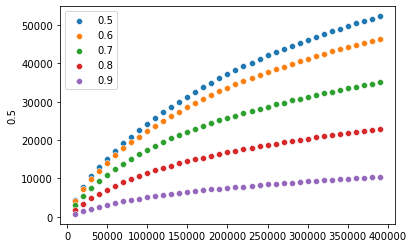

In [10]:
sns.scatterplot(data=df_sum, x=df_sum.index, y=0.5, label=0.5)
sns.scatterplot(data=df_sum, x=df_sum.index, y=0.6, label=0.6)
sns.scatterplot(data=df_sum, x=df_sum.index, y=0.7, label=0.7)
sns.scatterplot(data=df_sum, x=df_sum.index, y=0.8, label=0.8)
sns.scatterplot(data=df_sum, x=df_sum.index, y=0.9, label=0.9)
plt.legend()

In [12]:
%%time
df_sum = pd.DataFrame()

groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}
# for i in range(1000, df_imp.shape[0], 1000):
for i in range(10000, 100001, 10000):
    df_tmp = df.loc[df_imp.loc[0:i][0]]
#     j = 0.8
    for j in [0.5,0.6,0.7,0.8,0.9]:
        for k in groups.keys():
            df_sum.at[i, groups[k]+"_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k) | (df_tmp["small"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_large_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_small_"+str(j)] = df_tmp.loc[(df_tmp["small"+str(j)]==k)].shape[0]
df_sum.to_csv(datadir+"allprobes_imp_gini.csv")

CPU times: user 10.4 s, sys: 157 ms, total: 10.5 s
Wall time: 10.6 s


In [13]:
df_sum = pd.read_csv(datadir+"allprobes_imp_gini.csv")
df_sum

,Unnamed: 0,A_0.5,A_large_0.5,A_small_0.5,B_0.5,B_large_0.5,B_small_0.5,C_0.5,C_large_0.5,C_small_0.5,...,B_small_0.9,C_0.9,C_large_0.9,C_small_0.9,D_0.9,D_large_0.9,D_small_0.9,AB_0.9,AB_large_0.9,AB_small_0.9
0,10000,4420.0,2269.0,2151.0,2379.0,1946.0,433.0,463.0,95.0,368.0,...,83.0,2281.0,336.0,1945.0,63.0,31.0,32.0,382.0,365.0,17.0
1,20000,7774.0,4133.0,3641.0,4098.0,2958.0,1140.0,1167.0,333.0,834.0,...,163.0,4046.0,966.0,3080.0,158.0,72.0,86.0,645.0,599.0,46.0
2,30000,10528.0,5713.0,4815.0,5663.0,3843.0,1820.0,1871.0,573.0,1298.0,...,288.0,5546.0,1591.0,3955.0,268.0,119.0,149.0,854.0,776.0,78.0
3,40000,12927.0,7003.0,5924.0,7066.0,4653.0,2413.0,2519.0,821.0,1698.0,...,432.0,6862.0,2218.0,4644.0,359.0,164.0,195.0,1040.0,923.0,117.0
4,50000,15166.0,8133.0,7033.0,8408.0,5485.0,2923.0,3123.0,1047.0,2076.0,...,552.0,8119.0,2816.0,5303.0,496.0,212.0,284.0,1229.0,1070.0,159.0
5,60000,17242.0,9152.0,8090.0,9710.0,6304.0,3406.0,3717.0,1261.0,2456.0,...,674.0,9272.0,3374.0,5898.0,616.0,249.0,367.0,1379.0,1179.0,200.0
6,70000,19154.0,10078.0,9076.0,10900.0,7103.0,3797.0,4246.0,1465.0,2781.0,...,808.0,10345.0,3856.0,6489.0,749.0,313.0,436.0,1520.0,1282.0,238.0
7,80000,20929.0,10932.0,9997.0,11981.0,7857.0,4124.0,4750.0,1643.0,3107.0,...,916.0,11351.0,4349.0,7002.0,896.0,367.0,529.0,1670.0,1393.0,277.0
8,90000,22675.0,11756.0,10919.0,13051.0,8601.0,4450.0,5247.0,1811.0,3436.0,...,1045.0,12359.0,4823.0,7536.0,1047.0,425.0,622.0,1806.0,1502.0,304.0
9,100000,24284.0,12499.0,11785.0,14092.0,9358.0,4734.0,5739.0,1977.0,3762.0,...,1183.0,13260.0,5245.0,8015.0,1181.0,473.0,708.0,1928.0,1599.0,329.0


In [9]:
df_sum.head()
# df_sum.columns

,A_0.5,A_large_0.5,A_small_0.5,B_0.5,B_large_0.5,B_small_0.5,C_0.5,C_large_0.5,C_small_0.5,D_0.5,...,B_small_0.9,C_0.9,C_large_0.9,C_small_0.9,D_0.9,D_large_0.9,D_small_0.9,AB_0.9,AB_large_0.9,AB_small_0.9
10000,4420.0,2269.0,2151.0,2379.0,1946.0,433.0,463.0,95.0,368.0,100.0,...,83.0,2281.0,336.0,1945.0,63.0,31.0,32.0,382.0,365.0,17.0
20000,7774.0,4133.0,3641.0,4098.0,2958.0,1140.0,1167.0,333.0,834.0,382.0,...,163.0,4046.0,966.0,3080.0,158.0,72.0,86.0,645.0,599.0,46.0
30000,10528.0,5713.0,4815.0,5663.0,3843.0,1820.0,1871.0,573.0,1298.0,756.0,...,288.0,5546.0,1591.0,3955.0,268.0,119.0,149.0,854.0,776.0,78.0
40000,12927.0,7003.0,5924.0,7066.0,4653.0,2413.0,2519.0,821.0,1698.0,1184.0,...,432.0,6862.0,2218.0,4644.0,359.0,164.0,195.0,1040.0,923.0,117.0
50000,15166.0,8133.0,7033.0,8408.0,5485.0,2923.0,3123.0,1047.0,2076.0,1628.0,...,552.0,8119.0,2816.0,5303.0,496.0,212.0,284.0,1229.0,1070.0,159.0


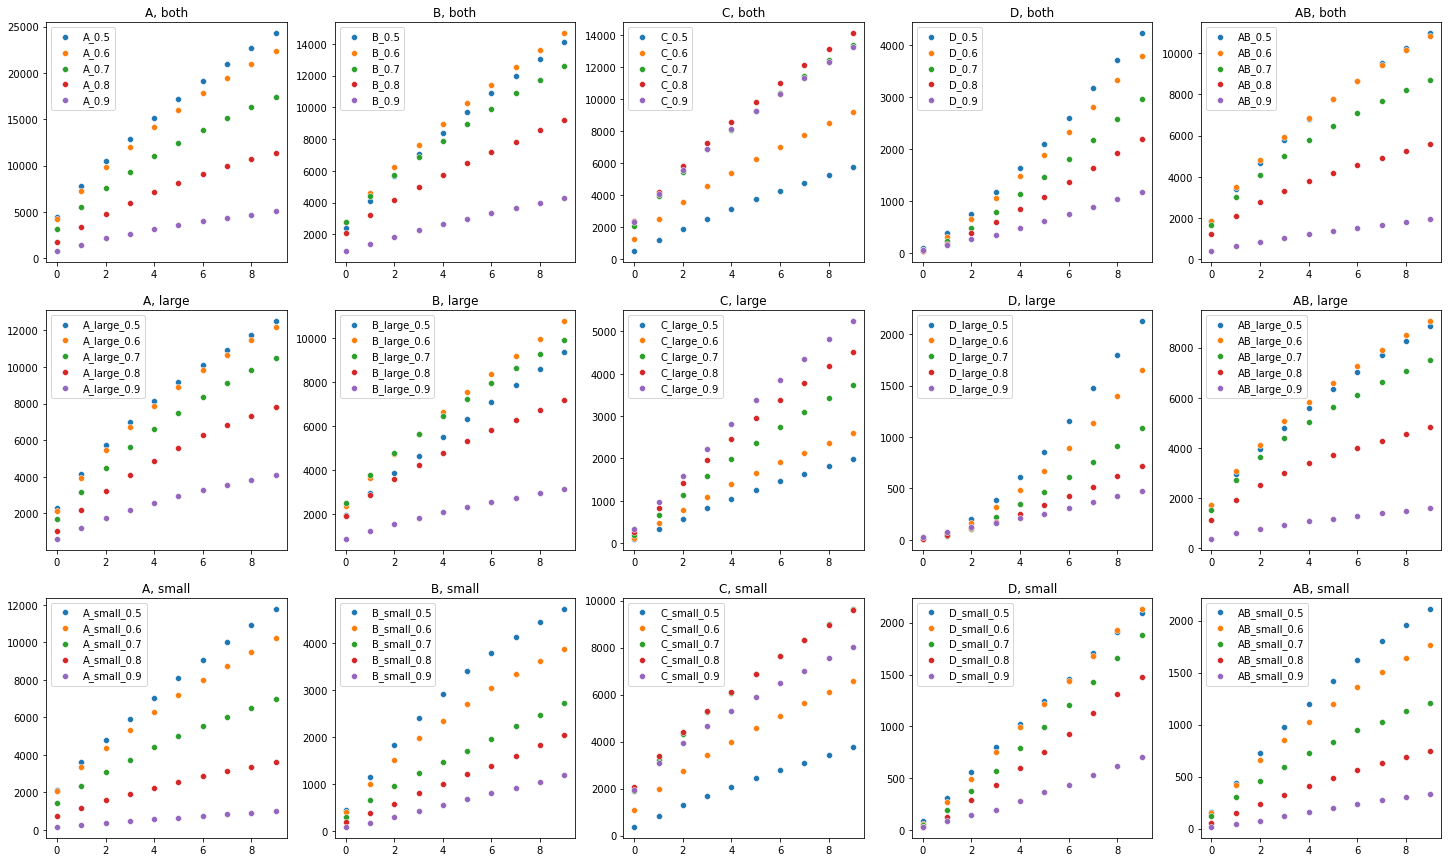

In [14]:
fig = plt.figure(figsize=(25, 15))

ax_num = 1
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_sum, x=df_sum.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", both")
    ax_num+=1
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_large_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_sum, x=df_sum.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", large")
    ax_num+=1 
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_small_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_sum, x=df_sum.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", small")
    ax_num+=1

In [17]:
%%time
df_sum = pd.DataFrame()

groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}
# for i in range(1000, df_imp.shape[0], 1000):
bins = 10000
for i in range(bins, 100001, bins):
    df_tmp = df.loc[df_imp.loc[i-bins:i][0]]
#     j = 0.8
    for j in [0.5,0.6,0.7,0.8,0.9]:
        for k in groups.keys():
            df_sum.at[i, groups[k]+"_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k) | (df_tmp["small"+str(j)]==k)].shape[0]/i
            df_sum.at[i, groups[k]+"_large_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k)].shape[0]/i
            df_sum.at[i, groups[k]+"_small_"+str(j)] = df_tmp.loc[(df_tmp["small"+str(j)]==k)].shape[0]/i
df_sum.to_csv(wd+"data/allprobes_imp_gini.csv")

CPU times: user 2.99 s, sys: 27.7 ms, total: 3.01 s
Wall time: 3.05 s


In [24]:
%%time
df_sum = pd.DataFrame()

groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}
bins = 10000
for i in range(bins, df_imp.shape[0], bins):
# for i in range(bins, 100001, bins):
    df_tmp = df.loc[df_imp.loc[i-bins:i][0]]
#     j = 0.8
    for j in [0.5,0.6,0.7,0.8,0.9]:
        for k in groups.keys():
            df_sum.at[i, groups[k]+"_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k) | (df_tmp["small"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_large_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_small_"+str(j)] = df_tmp.loc[(df_tmp["small"+str(j)]==k)].shape[0]
df_sum.to_csv(wd+"data/allprobes_imp_gini.csv")

CPU times: user 10.3 s, sys: 40.5 ms, total: 10.4 s
Wall time: 10.4 s


In [13]:
df_sum = pd.read_csv(wd+"data/allprobes_imp_gini.csv", index_col=0)
df_sum

,A_0.5,A_large_0.5,A_small_0.5,B_0.5,B_large_0.5,B_small_0.5,C_0.5,C_large_0.5,C_small_0.5,D_0.5,...,B_small_0.9,C_0.9,C_large_0.9,C_small_0.9,D_0.9,D_large_0.9,D_small_0.9,AB_0.9,AB_large_0.9,AB_small_0.9
10000,4420.0,2269.0,2151.0,2379.0,1946.0,433.0,463.0,95.0,368.0,100.0,...,83.0,2281.0,336.0,1945.0,63.0,31.0,32.0,382.0,365.0,17.0
20000,7774.0,4133.0,3641.0,4098.0,2958.0,1140.0,1167.0,333.0,834.0,382.0,...,163.0,4046.0,966.0,3080.0,158.0,72.0,86.0,645.0,599.0,46.0
30000,10528.0,5713.0,4815.0,5663.0,3843.0,1820.0,1871.0,573.0,1298.0,756.0,...,288.0,5546.0,1591.0,3955.0,268.0,119.0,149.0,854.0,776.0,78.0
40000,12927.0,7003.0,5924.0,7066.0,4653.0,2413.0,2519.0,821.0,1698.0,1184.0,...,432.0,6862.0,2218.0,4644.0,359.0,164.0,195.0,1040.0,923.0,117.0
50000,15166.0,8133.0,7033.0,8408.0,5485.0,2923.0,3123.0,1047.0,2076.0,1628.0,...,552.0,8119.0,2816.0,5303.0,496.0,212.0,284.0,1229.0,1070.0,159.0
60000,17242.0,9152.0,8090.0,9710.0,6304.0,3406.0,3717.0,1261.0,2456.0,2094.0,...,674.0,9272.0,3374.0,5898.0,616.0,249.0,367.0,1379.0,1179.0,200.0
70000,19154.0,10078.0,9076.0,10900.0,7103.0,3797.0,4246.0,1465.0,2781.0,2605.0,...,808.0,10345.0,3856.0,6489.0,749.0,313.0,436.0,1520.0,1282.0,238.0
80000,20929.0,10932.0,9997.0,11981.0,7857.0,4124.0,4750.0,1643.0,3107.0,3179.0,...,916.0,11351.0,4349.0,7002.0,896.0,367.0,529.0,1670.0,1393.0,277.0
90000,22675.0,11756.0,10919.0,13051.0,8601.0,4450.0,5247.0,1811.0,3436.0,3703.0,...,1045.0,12359.0,4823.0,7536.0,1047.0,425.0,622.0,1806.0,1502.0,304.0
100000,24284.0,12499.0,11785.0,14092.0,9358.0,4734.0,5739.0,1977.0,3762.0,4220.0,...,1183.0,13260.0,5245.0,8015.0,1181.0,473.0,708.0,1928.0,1599.0,329.0


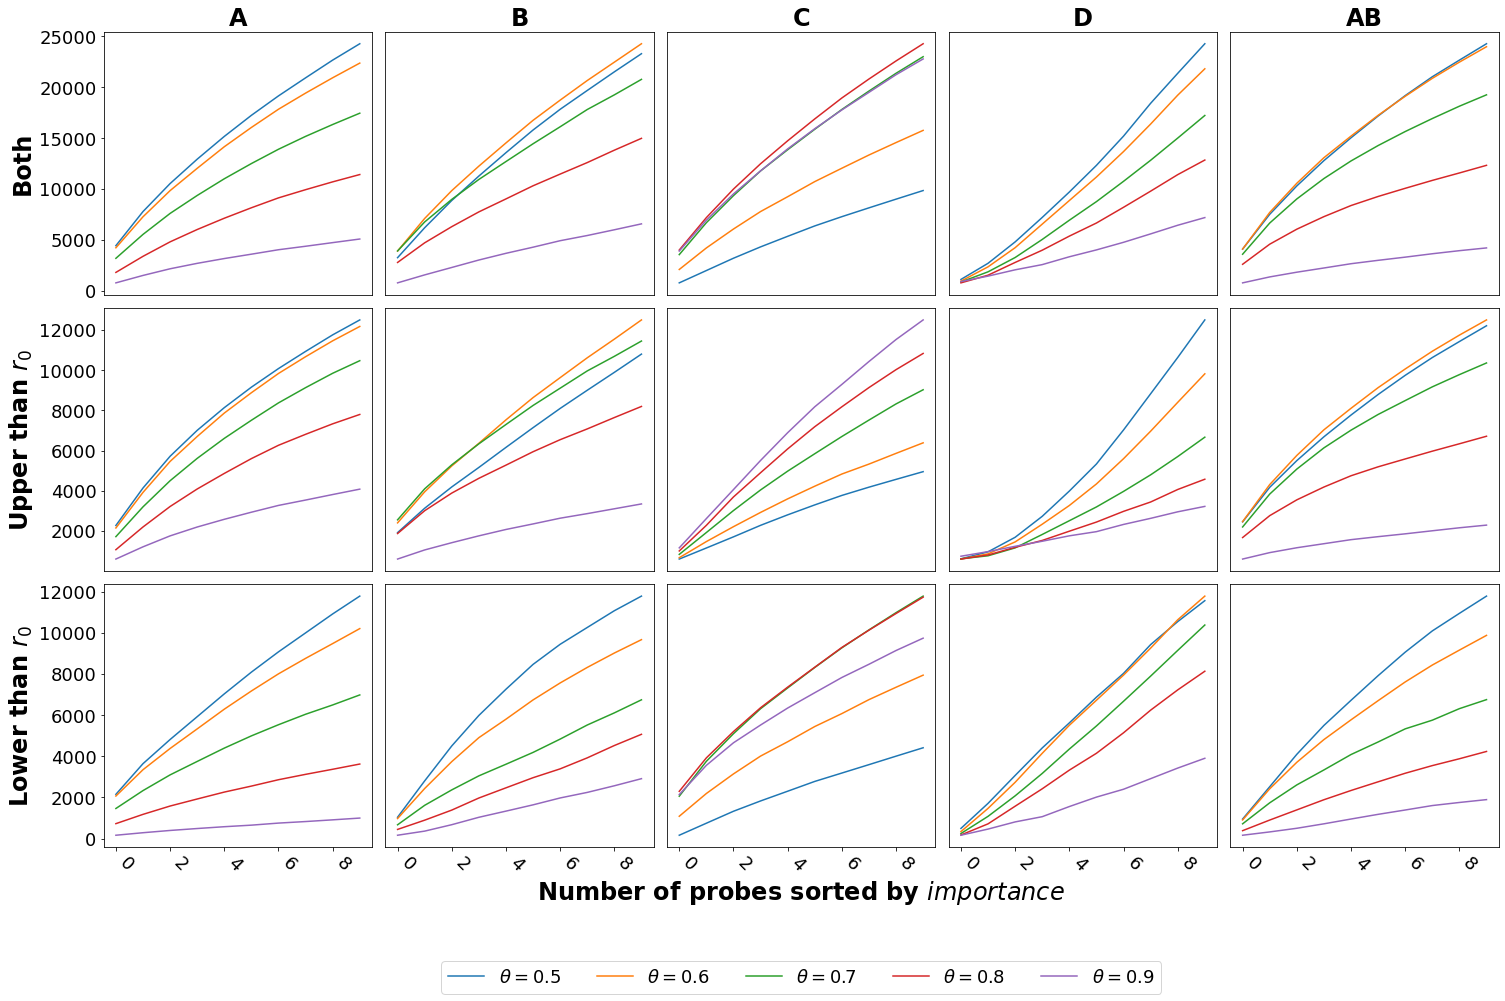

In [16]:
fig = plt.figure(figsize=(25, 15))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

ax_num = 1
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
#             sns.scatterplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel("Both", size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.5)
    plt.title(groups, size=24, weight="bold")
    ax_num+=1
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_large_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel(r'Upper than $r_0$', size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1 
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_small_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.xlabel("")
            plt.ylabel(r'Lower than $r_0$', size=24, weight="bold")
        elif groups=="C":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k, label=r"$\theta = $"+k.split("_")[-1])
            plt.legend(bbox_to_anchor=(0.5, -0.4), ncol=5, loc='upper center', fontsize=18)
            plt.yticks([])
            plt.xlabel("Number of probes sorted by "+r"$importance$", size=24, weight="bold")
            plt.ylabel("")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
            plt.xlabel("")
#             plt.legend()
    plt.xticks(size=18, rotation=-45, ha="left")
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1
plt.savefig(outdir+"imp_gini.pdf", bbox_inches="tight")


# enhancer

In [17]:
%%time
df_enha = pd.DataFrame()
groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}

for i in range(10000, df_imp.shape[0], 10000):
# for i in range(10000, 100001, 10000):
    df_tmp = df.loc[df_imp.loc[0:i][0]]
    for j in [0.5,0.6,0.7,0.8,0.9]:
        for k in groups.keys():
            df_enha.at[i, groups[k]+"_"+str(j)] = df_tmp.loc[((df_tmp["large"+str(j)]==k) | (df_tmp["small"+str(j)]==k)) & (df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].shape[0]
            df_enha.at[i, groups[k]+"_large_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k) & (df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].shape[0]
            df_enha.at[i, groups[k]+"_small_"+str(j)] = df_tmp.loc[(df_tmp["small"+str(j)]==k) & (df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].shape[0]

df_enha.head()

CPU times: user 12min 28s, sys: 11.4 s, total: 12min 40s
Wall time: 12min 41s


,A_0.5,A_large_0.5,A_small_0.5,B_0.5,B_large_0.5,B_small_0.5,C_0.5,C_large_0.5,C_small_0.5,D_0.5,...,B_small_0.9,C_0.9,C_large_0.9,C_small_0.9,D_0.9,D_large_0.9,D_small_0.9,AB_0.9,AB_large_0.9,AB_small_0.9
10000,1215.0,644.0,571.0,651.0,603.0,48.0,170.0,14.0,156.0,31.0,...,11.0,676.0,62.0,614.0,13.0,9.0,4.0,138.0,136.0,2.0
20000,2156.0,1194.0,962.0,1115.0,980.0,135.0,411.0,55.0,356.0,98.0,...,23.0,1157.0,149.0,1008.0,34.0,17.0,17.0,220.0,210.0,10.0
30000,2964.0,1677.0,1287.0,1451.0,1252.0,199.0,643.0,83.0,560.0,187.0,...,46.0,1527.0,232.0,1295.0,52.0,24.0,28.0,280.0,265.0,15.0
40000,3650.0,2068.0,1582.0,1779.0,1513.0,266.0,825.0,105.0,720.0,269.0,...,67.0,1869.0,325.0,1544.0,70.0,36.0,34.0,324.0,305.0,19.0
50000,4279.0,2395.0,1884.0,2130.0,1795.0,335.0,1008.0,132.0,876.0,342.0,...,82.0,2184.0,410.0,1774.0,96.0,47.0,49.0,363.0,341.0,22.0


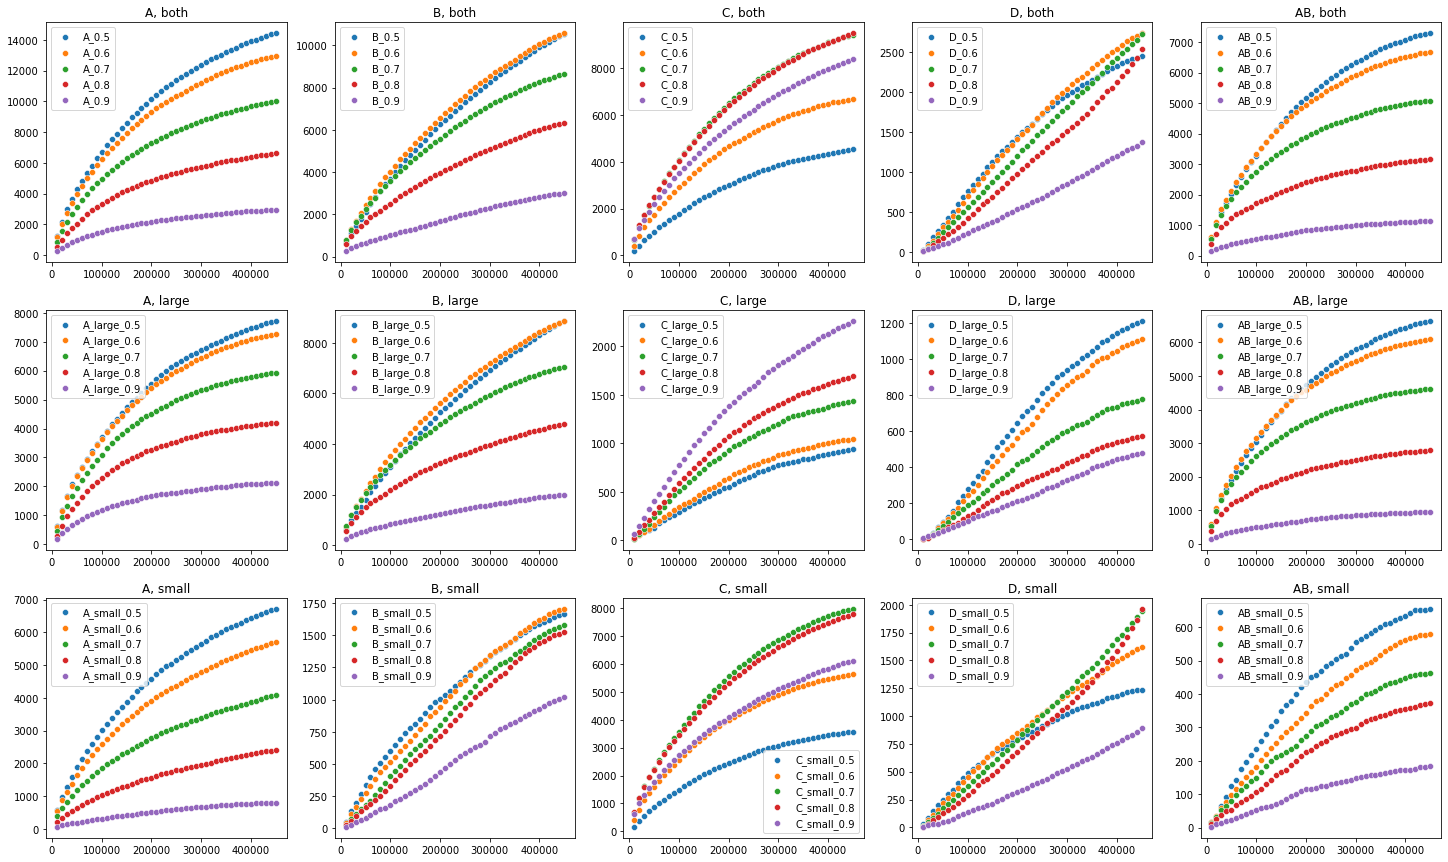

In [18]:
fig = plt.figure(figsize=(25, 15))

ax_num = 1
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_enha, x=df_enha.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", both")
    ax_num+=1
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_large_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_enha, x=df_enha.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", large")
    ax_num+=1 
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_small_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        sns.scatterplot(data=df_enha, x=df_enha.index, y=k, label=k)
    plt.legend()
    plt.ylabel("")
    plt.title(groups+", small")
    ax_num+=1

In [147]:
df["Regulatory_Feature_Name"].value_counts()

6:32120376-32123743       70
6:30710361-30712511       63
7:94285312-94288187       56
6:33385034-33386783       50
6:31939216-31940908       49
                          ..
18:77223211-77223432       1
17:77755413-77755556       1
17:57598734-57599884       1
12:123444069-123444212     1
3:187037473-187037850      1
Name: Regulatory_Feature_Name, Length: 46388, dtype: int64

In [19]:
%%time
df_imp_anno = pd.DataFrame()
groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}

bins = 10000
for i in range(bins, df_imp.shape[0], bins):
# for i in range(10000, df_imp.shape[0], 10000):
# for i in range(10000, 100001, 10000):
    df_tmp = df.loc[df_imp.loc[0:i][0]]
    df_imp_anno.at[i, "Island"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["Relation_to_UCSC_CpG_Island"]=="Island"].index))].shape[0]
    df_imp_anno.at[i, "Shore"] = df_tmp.loc[(df_tmp.index.isin(df.loc[(df["Relation_to_UCSC_CpG_Island"]=="N_Shore") | (df["Relation_to_UCSC_CpG_Island"]=="S_Shore")].index))].shape[0]
    df_imp_anno.at[i, "Shelf"] = df_tmp.loc[(df_tmp.index.isin(df.loc[(df["Relation_to_UCSC_CpG_Island"]=="N_Shelf") | (df["Relation_to_UCSC_CpG_Island"]=="S_Shelf")].index))].shape[0]
    df_imp_anno.at[i, "450k_Enhancer"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].shape[0]
    df_imp_anno.at[i, "Phantom4_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom4_Enhancers"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "Phantom5_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom5_Enhancers"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "DMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="DMR"].index))].shape[0]
    df_imp_anno.at[i, "RDMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="RDMR"].index))].shape[0]
    df_imp_anno.at[i, "CDMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="CDMR"].index))].shape[0]
    df_imp_anno.at[i, "HMM_Island"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["HMM_Island"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "Regulatory_Feature_Name"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Regulatory_Feature_Name"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "DNase_Hypersensitivity_NAME"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["DNase_Hypersensitivity_NAME"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "OpenChromatin_NAME"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["OpenChromatin_NAME"].isnull()].index))].shape[0]
    df_imp_anno.at[i, "TFBS_Evidence_Count"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["TFBS_Evidence_Count"].isnull()].index))].shape[0]
#     df_imp_anno.at[i, "Phantom5_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["Phantom5_Enhancers"]==True].index))].shape[0]

df_imp_anno.head()

CPU times: user 2min 37s, sys: 2.93 s, total: 2min 40s
Wall time: 2min 40s


,Island,Shore,Shelf,450k_Enhancer,Phantom4_Enhancers,Phantom5_Enhancers,DMR,RDMR,CDMR,HMM_Island,Regulatory_Feature_Name,DNase_Hypersensitivity_NAME,OpenChromatin_NAME,TFBS_Evidence_Count
10000,1674.0,2371.0,1363.0,2811.0,152.0,185.0,150.0,386.0,172.0,3511.0,2004.0,5878.0,1643.0,1234.0
20000,3626.0,5012.0,2557.0,5527.0,362.0,399.0,396.0,726.0,347.0,7554.0,4325.0,11744.0,3253.0,2523.0
30000,5645.0,7644.0,3673.0,8040.0,618.0,602.0,633.0,1073.0,508.0,11806.0,6832.0,17419.0,4853.0,3758.0
40000,7798.0,10119.0,4792.0,10466.0,952.0,787.0,894.0,1409.0,668.0,16186.0,9358.0,23063.0,6343.0,5059.0
50000,9917.0,12592.0,5923.0,12867.0,1316.0,983.0,1198.0,1740.0,827.0,20560.0,11914.0,28738.0,7750.0,6293.0


In [20]:
%%time
# proportion
df_imp_anno = pd.DataFrame()
groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}

for i in range(1000, df_imp.shape[0], 1000):
# for i in range(10000, 100001, 10000):
    df_tmp = df.loc[df_imp.loc[0:i][0]]
    df_imp_anno.at[i, "Island"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["Relation_to_UCSC_CpG_Island"]=="Island"].index))].shape[0]/i
    df_imp_anno.at[i, "Shore"] = df_tmp.loc[(df_tmp.index.isin(df.loc[(df["Relation_to_UCSC_CpG_Island"]=="N_Shore") | (df["Relation_to_UCSC_CpG_Island"]=="S_Shore")].index))].shape[0]/i
    df_imp_anno.at[i, "Shelf"] = df_tmp.loc[(df_tmp.index.isin(df.loc[(df["Relation_to_UCSC_CpG_Island"]=="N_Shelf") | (df["Relation_to_UCSC_CpG_Island"]=="S_Shelf")].index))].shape[0]/i
    df_imp_anno.at[i, "450k_Enhancer"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].shape[0]/i
    df_imp_anno.at[i, "Phantom4_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom4_Enhancers"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "Phantom5_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom5_Enhancers"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "DMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="DMR"].index))].shape[0]/i
    df_imp_anno.at[i, "RDMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="RDMR"].index))].shape[0]/i
    df_imp_anno.at[i, "CDMR"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="CDMR"].index))].shape[0]/i
    df_imp_anno.at[i, "HMM_Island"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["HMM_Island"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "Regulatory_Feature_Name"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Regulatory_Feature_Name"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "DNase_Hypersensitivity_NAME"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["DNase_Hypersensitivity_NAME"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "OpenChromatin_NAME"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["OpenChromatin_NAME"].isnull()].index))].shape[0]/i
    df_imp_anno.at[i, "TFBS_Evidence_Count"] = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["TFBS_Evidence_Count"].isnull()].index))].shape[0]/i
#     df_imp_anno.at[i, "Phantom5_Enhancers"] = df_tmp.loc[(df_tmp.index.isin(df.loc[df["Phantom5_Enhancers"]==True].index))].shape[0]

df_imp_anno.head()

CPU times: user 26min 17s, sys: 32.4 s, total: 26min 49s
Wall time: 26min 53s


,Island,Shore,Shelf,450k_Enhancer,Phantom4_Enhancers,Phantom5_Enhancers,DMR,RDMR,CDMR,HMM_Island,Regulatory_Feature_Name,DNase_Hypersensitivity_NAME,OpenChromatin_NAME,TFBS_Evidence_Count
1000,0.124000,0.188000,0.162000,0.281000,0.009000,0.015000,0.019000,0.03000,0.0170,0.277000,0.176000,0.571000,0.141000,0.116000
2000,0.130000,0.201500,0.156500,0.280500,0.012000,0.016000,0.017000,0.03400,0.0140,0.300000,0.178500,0.597500,0.141000,0.122500
3000,0.140333,0.202333,0.151667,0.288333,0.013667,0.016333,0.013333,0.03300,0.0150,0.307333,0.173667,0.586667,0.146667,0.127667
4000,0.143000,0.213000,0.149000,0.294750,0.012250,0.017000,0.013750,0.03325,0.0165,0.318500,0.181000,0.590500,0.147250,0.124750
5000,0.148200,0.220800,0.145800,0.290200,0.011000,0.016800,0.013600,0.03720,0.0150,0.326200,0.186000,0.591000,0.151000,0.121000


Text(0, 0.5, '')

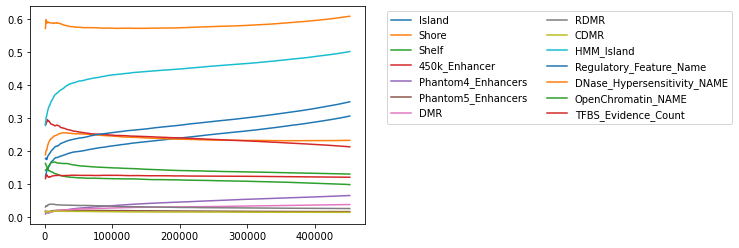

In [21]:
for k in df_imp_anno.columns:
    sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k)
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1))
plt.ylabel("")


# annotation

In [214]:
df_anno = df

In [60]:
%%time
# proportion
df_imp_anno = pd.DataFrame()
groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}

bins = 10000
for i in range(bins, df_imp.shape[0], bins):
# for i in range(1000, df_imp.shape[0], 1000):
# for i in range(10000, 100001, 10000):
    df_tmp = df.loc[df_imp.loc[i-bins:i][0]]
    
    df_anno = df.loc[(~df["UCSC_RefGene_Group"].isnull()) & (df.index.isin(df_tmp.index))]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS200")].index
    df_imp_anno.at[i, "TSS200"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS")].index
    df_imp_anno.at[i, "TSS"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS") | df_anno["UCSC_RefGene_Group"].str.contains("1stExon") | df_anno["UCSC_RefGene_Group"].str.contains("5'UTR")].index
    df_imp_anno.at[i, "promoter"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("Body")].index
    df_imp_anno.at[i, "Body"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("3'UTR")].index
    df_imp_anno.at[i, "3UTR"] = df_tmp.loc[probes].shape[0]

    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS200") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
    df_imp_anno.at[i, "CGI_TSS200"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[(df_anno["UCSC_RefGene_Group"].str.contains("TSS") | df_anno["UCSC_RefGene_Group"].str.contains("1stExon")) & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
    df_imp_anno.at[i, "CGI_promoter"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("Body") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
    df_imp_anno.at[i, "CGI_Body"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("3'UTR") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
    df_imp_anno.at[i, "CGI_3UTR"] = df_tmp.loc[probes].shape[0]
    
    df_anno = df.loc[(~df["Relation_to_UCSC_CpG_Island"].isnull()) & (df.index.isin(df_tmp.index))]
    probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
    df_imp_anno.at[i, "CGI"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shore")].index
    df_imp_anno.at[i, "shore"] = df_tmp.loc[probes].shape[0]
    probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shore") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shelf")].index
    df_imp_anno.at[i, "shelf"] = df_tmp.loc[probes].shape[0]

    df_anno = df
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[df["450k_Enhancer"]==True].index))].index
    df_imp_anno.at[i, "450k_Enhancer"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom4_Enhancers"].isnull()].index))].index
    df_imp_anno.at[i, "Phantom4_Enhancers"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Phantom5_Enhancers"].isnull()].index))].index
    df_imp_anno.at[i, "Phantom5_Enhancers"] = df_tmp.loc[probes].shape[0]

    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="DMR"].index))].index
    df_imp_anno.at[i, "DMR"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="RDMR"].index))].index
    df_imp_anno.at[i, "RDMR"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[df["DMR"]=="CDMR"].index))].index
    df_imp_anno.at[i, "CDMR"] = df_tmp.loc[probes].shape[0]

    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["HMM_Island"].isnull()].index))].index
    df_imp_anno.at[i, "HMM_Island"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["Regulatory_Feature_Name"].isnull()].index))].index
    df_imp_anno.at[i, "Regulatory_Feature"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["DNase_Hypersensitivity_NAME"].isnull()].index))].index
    df_imp_anno.at[i, "DNase_Hypersensitivity"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["OpenChromatin_NAME"].isnull()].index))].index
    df_imp_anno.at[i, "OpenChromatin"] = df_tmp.loc[probes].shape[0]
    probes = df_tmp.loc[(df_tmp.index.isin(df.loc[~df["TFBS_Evidence_Count"].isnull()].index))].index
    df_imp_anno.at[i, "TFBS_Evidence"] = df_tmp.loc[probes].shape[0]
df_imp_anno.to_csv(wd+"data/allprobes_imp_anno.csv")
df_imp_anno.head()

CPU times: user 1min 10s, sys: 763 ms, total: 1min 11s
Wall time: 1min 11s


,TSS200,TSS,promoter,Body,3UTR,CGI_TSS200,CGI_promoter,CGI_Body,CGI_3UTR,CGI,...,Phantom4_Enhancers,Phantom5_Enhancers,DMR,RDMR,CDMR,HMM_Island,Regulatory_Feature,DNase_Hypersensitivity,OpenChromatin,TFBS_Evidence
10000,759.0,2043.0,3088.0,3790.0,478.0,143.0,372.0,813.0,63.0,1674.0,...,152.0,185.0,150.0,386.0,172.0,3511.0,2004.0,5878.0,1643.0,1234.0
20000,694.0,2119.0,3109.0,3896.0,458.0,182.0,528.0,885.0,66.0,1952.0,...,210.0,214.0,246.0,340.0,175.0,4043.0,2321.0,5867.0,1610.0,1289.0
30000,727.0,2211.0,3165.0,3836.0,409.0,251.0,637.0,852.0,54.0,2019.0,...,256.0,203.0,237.0,347.0,161.0,4252.0,2507.0,5675.0,1601.0,1235.0
40000,764.0,2145.0,3180.0,3799.0,428.0,312.0,754.0,839.0,56.0,2153.0,...,334.0,185.0,261.0,336.0,160.0,4380.0,2526.0,5645.0,1490.0,1301.0
50000,778.0,2174.0,3216.0,3788.0,465.0,346.0,807.0,766.0,56.0,2120.0,...,364.0,196.0,304.0,331.0,159.0,4375.0,2556.0,5676.0,1407.0,1234.0


In [51]:
df_imp_anno = pd.read_csv(wd+"data/allprobes_imp_anno.csv", index_col=0)
df_imp_anno

,TSS200,TSS,promoter,Body,3UTR,CGI_TSS200,CGI_promoter,CGI_Body,CGI_3UTR,CGI,...,Phantom4_Enhancers,Phantom5_Enhancers,DMR,RDMR,CDMR,HMM_Island,Regulatory_Feature,DNase_Hypersensitivity,OpenChromatin,TFBS_Evidence
1000,0.098000,0.231000,0.344000,0.353000,0.048000,0.009000,0.020000,0.063000,0.004000,0.124000,...,0.009000,0.015000,0.019000,0.030000,0.017000,0.277000,0.176000,0.571000,0.141000,0.116000
2000,0.095500,0.237500,0.342500,0.359000,0.046500,0.014000,0.028000,0.063000,0.004500,0.130000,...,0.012000,0.016000,0.017000,0.034000,0.014000,0.300000,0.178500,0.597500,0.141000,0.122500
3000,0.084000,0.221667,0.324667,0.370000,0.047333,0.012333,0.028000,0.072333,0.005000,0.140333,...,0.013667,0.016333,0.013333,0.033000,0.015000,0.307333,0.173667,0.586667,0.146667,0.127667
4000,0.085250,0.218750,0.322000,0.370750,0.046250,0.013750,0.030250,0.074000,0.004750,0.143000,...,0.012250,0.017000,0.013750,0.033250,0.016500,0.318500,0.181000,0.590500,0.147250,0.124750
5000,0.081800,0.213800,0.315600,0.377400,0.044800,0.013200,0.031000,0.076600,0.004400,0.148200,...,0.011000,0.016800,0.013600,0.037200,0.015000,0.326200,0.186000,0.591000,0.151000,0.121000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448000,0.127688,0.286902,0.409775,0.362629,0.041127,0.079562,0.168759,0.087571,0.004989,0.303828,...,0.064424,0.016069,0.037219,0.025337,0.013833,0.499587,0.346951,0.606750,0.130009,0.120163
449000,0.127833,0.287163,0.410174,0.362481,0.041114,0.079702,0.169105,0.087592,0.004989,0.304209,...,0.064479,0.016060,0.037283,0.025321,0.013826,0.499929,0.347361,0.606996,0.129998,0.120167
450000,0.128069,0.287562,0.410709,0.362260,0.041062,0.079896,0.169533,0.087602,0.004987,0.304689,...,0.064591,0.016062,0.037338,0.025311,0.013818,0.500320,0.347900,0.607333,0.129944,0.120160
451000,0.128224,0.287851,0.411089,0.362144,0.041027,0.080027,0.169894,0.087698,0.004989,0.305177,...,0.064698,0.016069,0.037395,0.025293,0.013803,0.500701,0.348417,0.607652,0.129887,0.120157


In [52]:
cols = {"promoter":"palegreen", "TSS200":"r","TSS":"tan","Body":"maroon","3UTR":"mediumpurple"
           ,"CGI":"b","shore":"royalblue","shelf":"skyblue"
           ,"CGI_promoter":"palegreen","CGI_TSS200":"r","CGI_Body":"chartreuse","CGI_3UTR":"mediumpurple"
           ,"Phantom4_Enhancers":"darkkhaki","Phantom5_Enhancers":"yellow","450k_Enhancer":"orange","pha5enha_CGI":"yellow","450Kenha_CGI":"orange"
           ,"DMR":"teal","RDMR":"teal","CDMR":"teal","HMM_Island":"b"
           ,"Regulatory_Feature":"indianred","DNase_Hypersensitivity":"bisque","TFBS_Evidence":"palevioletred","OpenChromatin":"coral"
          ,"SNP":"limegreen"}


Text(0, 0.5, '')

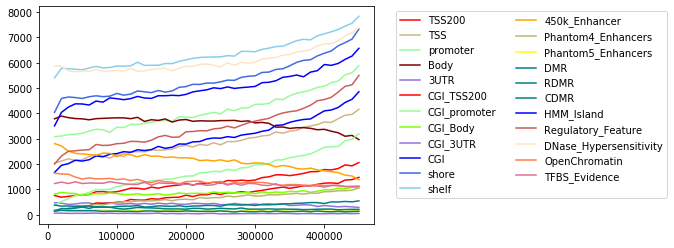

In [39]:

for k in df_imp_anno.columns:
    if k.find("CGI_")==-1:
        sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
        
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1))
plt.ylabel("")


Text(0, 0.5, '')

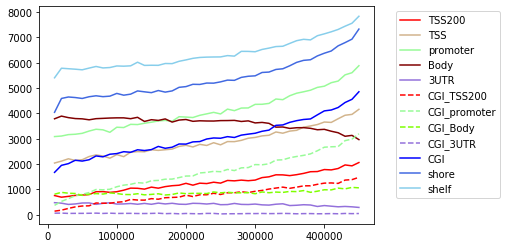

In [40]:

for k in df_imp_anno.columns[:12]:
    if k.find("CGI_")==-1:
        sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        plt.plot(df_imp_anno.index, df_imp_anno[k], label=k, color=cols[k], linestyle="dashed")
#         sns.lineplot(data=df_imp_anno, x=df_imzp_anno.index, y=k, label=k, color=cols[k], dashes=True)
        
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel("")


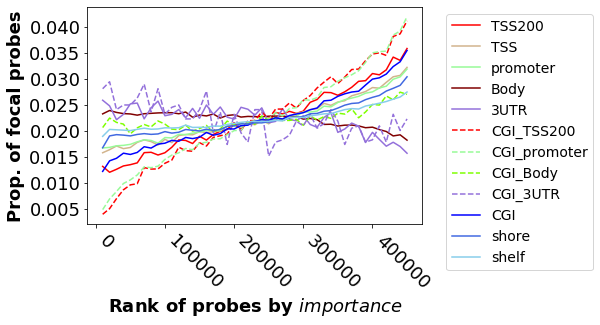

In [62]:

for k in df_imp_anno.columns[:12]:
    if k.find("CGI_")==-1:
        plt.plot(df_imp_anno.index, df_imp_anno[k]/df_imp_anno[k].sum(), label=k, color=cols[k])
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        plt.plot(df_imp_anno.index, df_imp_anno[k]/df_imp_anno[k].sum(), label=k, color=cols[k], linestyle="dashed")
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
plt.xticks(size=18, rotation=-45, ha="left")        
plt.yticks(size=18)
plt.xlabel("Rank of probes by "+r"$importance$", size=18, weight="bold")
plt.ylabel('Prop. of focal probes', size=18, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)
plt.savefig(wd+"fig/imp_anno1.pdf", bbox_inches="tight")


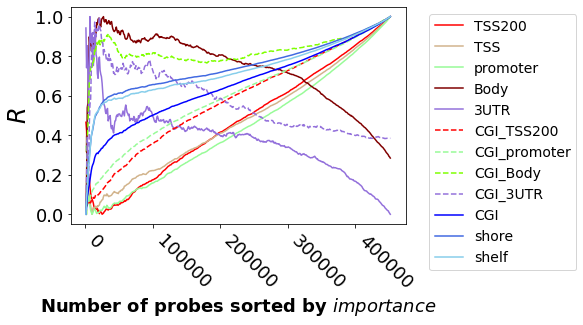

In [20]:

for k in df_imp_anno.columns[:12]:
    if k.find("CGI_")==-1:
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k])
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k], linestyle="dashed")
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
plt.xticks(size=18, rotation=-45, ha="left")        
plt.yticks(size=18)
plt.xlabel("Number of probes sorted by "+r"$importance$", size=18, weight="bold")
plt.ylabel(r'$R$', size=24, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)
plt.savefig(wd+"fig/imp_anno1.pdf", bbox_inches="tight")


Text(0, 0.5, '')

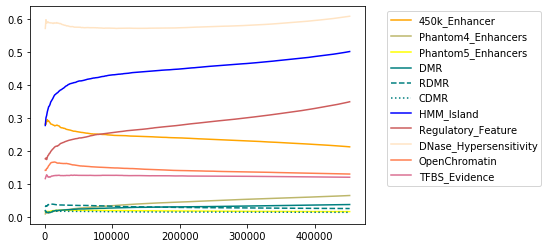

In [17]:

for k in df_imp_anno.columns[12:]:
    if k=="RDMR":
        plt.plot(df_imp_anno.index, df_imp_anno[k], label=k, color=cols[k], linestyle="dashed")
    elif k=="CDMR":
        plt.plot(df_imp_anno.index, df_imp_anno[k], label=k, color=cols[k], linestyle="dotted")
    elif k.find("CGI_")==-1:
        sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        plt.plot(df_imp_anno.index, df_imp_anno[k], label=k, color=cols[k], linestyle="dashed")
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
        
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel("")


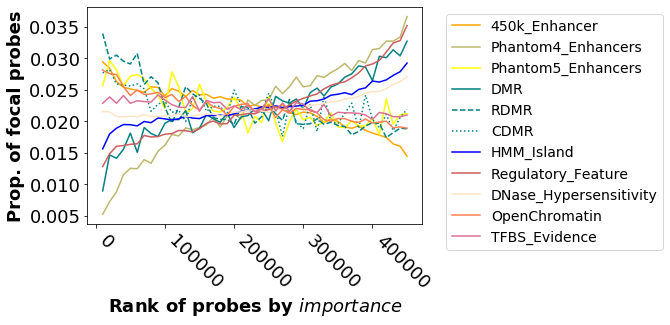

In [61]:

for k in df_imp_anno.columns[12:]:
    if k=="RDMR":
        plt.plot(df_imp_anno.index, df_imp_anno[k]/df_imp_anno[k].sum(), label=k, color=cols[k], linestyle="dashed")
    elif k=="CDMR":
        plt.plot(df_imp_anno.index, df_imp_anno[k]/df_imp_anno[k].sum(), label=k, color=cols[k], linestyle="dotted")
    else:
        plt.plot(df_imp_anno.index, df_imp_anno[k]/df_imp_anno[k].sum(), label=k, color=cols[k])
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
        
plt.xticks(size=18, rotation=-45, ha="left")        
plt.yticks(size=18)
plt.xlabel("Rank of probes by "+r"$importance$", size=18, weight="bold")
plt.ylabel('Prop. of focal probes', size=18, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)
plt.savefig(wd+"fig/imp_anno2.pdf", bbox_inches="tight")


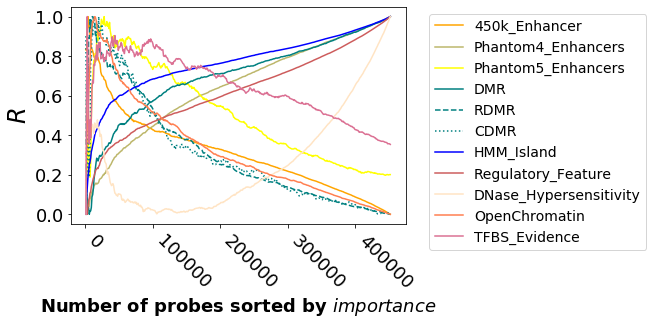

In [55]:

for k in df_imp_anno.columns[12:]:
    if k=="RDMR":
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k], linestyle="dashed")
    elif k=="CDMR":
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k], linestyle="dotted")
    else:
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k])
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
        
plt.xticks(size=18, rotation=-45, ha="left")        
plt.yticks(size=18)
plt.xlabel("Number of probes sorted by "+r"$importance$", size=18, weight="bold")
plt.ylabel(r'$R$', size=24, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)
plt.savefig(wd+"fig/imp_anno2.pdf", bbox_inches="tight")


In [56]:
df_imp_anno

,TSS200,TSS,promoter,Body,3UTR,CGI_TSS200,CGI_promoter,CGI_Body,CGI_3UTR,CGI,...,Phantom4_Enhancers,Phantom5_Enhancers,DMR,RDMR,CDMR,HMM_Island,Regulatory_Feature,DNase_Hypersensitivity,OpenChromatin,TFBS_Evidence
1000,0.098000,0.231000,0.344000,0.353000,0.048000,0.009000,0.020000,0.063000,0.004000,0.124000,...,0.009000,0.015000,0.019000,0.030000,0.017000,0.277000,0.176000,0.571000,0.141000,0.116000
2000,0.095500,0.237500,0.342500,0.359000,0.046500,0.014000,0.028000,0.063000,0.004500,0.130000,...,0.012000,0.016000,0.017000,0.034000,0.014000,0.300000,0.178500,0.597500,0.141000,0.122500
3000,0.084000,0.221667,0.324667,0.370000,0.047333,0.012333,0.028000,0.072333,0.005000,0.140333,...,0.013667,0.016333,0.013333,0.033000,0.015000,0.307333,0.173667,0.586667,0.146667,0.127667
4000,0.085250,0.218750,0.322000,0.370750,0.046250,0.013750,0.030250,0.074000,0.004750,0.143000,...,0.012250,0.017000,0.013750,0.033250,0.016500,0.318500,0.181000,0.590500,0.147250,0.124750
5000,0.081800,0.213800,0.315600,0.377400,0.044800,0.013200,0.031000,0.076600,0.004400,0.148200,...,0.011000,0.016800,0.013600,0.037200,0.015000,0.326200,0.186000,0.591000,0.151000,0.121000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448000,0.127688,0.286902,0.409775,0.362629,0.041127,0.079562,0.168759,0.087571,0.004989,0.303828,...,0.064424,0.016069,0.037219,0.025337,0.013833,0.499587,0.346951,0.606750,0.130009,0.120163
449000,0.127833,0.287163,0.410174,0.362481,0.041114,0.079702,0.169105,0.087592,0.004989,0.304209,...,0.064479,0.016060,0.037283,0.025321,0.013826,0.499929,0.347361,0.606996,0.129998,0.120167
450000,0.128069,0.287562,0.410709,0.362260,0.041062,0.079896,0.169533,0.087602,0.004987,0.304689,...,0.064591,0.016062,0.037338,0.025311,0.013818,0.500320,0.347900,0.607333,0.129944,0.120160
451000,0.128224,0.287851,0.411089,0.362144,0.041027,0.080027,0.169894,0.087698,0.004989,0.305177,...,0.064698,0.016069,0.037395,0.025293,0.013803,0.500701,0.348417,0.607652,0.129887,0.120157


In [ ]:

for k in df_imp_anno.columns[:12]:
    if k.find("CGI_")==-1:
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k])
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k])
    else:
        plt.plot(df_imp_anno.index, (df_imp_anno[k]-df_imp_anno[k].min())/(df_imp_anno[k].max()-df_imp_anno[k].min()), label=k, color=cols[k], linestyle="dashed")
#         sns.lineplot(data=df_imp_anno, x=df_imp_anno.index, y=k, label=k, color=cols[k], dashes=True)
plt.xticks(size=18, rotation=-45, ha="left")        
plt.yticks(size=18)
plt.xlabel("Number of probes sorted by "+r"$importance$", size=18, weight="bold")
plt.ylabel(r'$R$', size=24, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1))


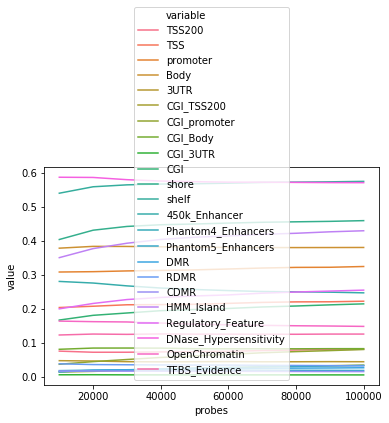

In [287]:
sns.lineplot(data=df_imp_anno_melt, x="probes", y="value", hue="variable")

In [265]:
df_imp_anno_melt = pd.DataFrame()
for i,items in df_imp_anno.iterrows():
    for k in df_imp_anno.columns:
        j = df_imp_anno_melt.shape[0]+1
        df_imp_anno_melt.at[j, "probes"] = i
        df_imp_anno_melt.at[j, "variable"] = k
        df_imp_anno_melt.at[j, "value"] = items[k]
df_imp_anno_melt    

,probes,variable,value
1,10000.0,TSS200,0.07590
2,10000.0,TSS,0.20430
3,10000.0,promoter,0.30880
4,10000.0,Body,0.37900
5,10000.0,3UTR,0.04780
...,...,...,...
226,100000.0,HMM_Island,0.43026
227,100000.0,Regulatory_Feature,0.25547
228,100000.0,DNase_Hypersensitivity,0.57180
229,100000.0,OpenChromatin,0.14872


In [43]:
index_tmp = [k for k in df_sum.index if len(k) > 2]
df_sum = df_sum.loc[df_sum.index.isin(index_tmp)]
df_sum.sort_values("probes")

,probes,large0.7_MYCNA,small0.7_MYCNA,both0.7_MYCNA,large0.7_4,small0.7_4,both0.7_4,large0.8_MYCNA,small0.8_MYCNA,both0.8_MYCNA,large0.8_4,small0.8_4,both0.8_4
RPS2,47.0,12.0,10.0,22.0,4.0,1.0,5.0,4.0,4.0,8.0,3.0,3.0,6.0
PRR29-AS1,47.0,1.0,0.0,1.0,25.0,0.0,25.0,1.0,1.0,2.0,18.0,0.0,18.0
PRR29,47.0,1.0,0.0,1.0,25.0,0.0,25.0,1.0,1.0,2.0,18.0,0.0,18.0
ICAM2,48.0,1.0,0.0,1.0,25.0,0.0,25.0,2.0,1.0,3.0,18.0,0.0,18.0
CLPTM1L,48.0,35.0,0.0,35.0,0.0,4.0,4.0,15.0,0.0,15.0,0.0,8.0,8.0
HCG25,49.0,6.0,4.0,10.0,29.0,0.0,29.0,2.0,3.0,5.0,21.0,0.0,21.0
CD79B,50.0,1.0,0.0,1.0,26.0,0.0,26.0,1.0,1.0,2.0,18.0,0.0,18.0
CSHL1,50.0,1.0,0.0,1.0,26.0,0.0,26.0,1.0,1.0,2.0,18.0,0.0,18.0
RPS6,51.0,4.0,4.0,8.0,20.0,0.0,20.0,0.0,5.0,5.0,20.0,0.0,20.0
CLPTM1,51.0,37.0,0.0,37.0,0.0,4.0,4.0,16.0,0.0,16.0,0.0,8.0,8.0


In [53]:
df_sum.sort_values("large0.8_MYCNA", ascending=False)[:30]
# df_sum.sort_values("small0.8_MYCNA", ascending=False)[:30]

# df_sum.sort_values("large0.8_4", ascending=False)[:30]
# df_sum.sort_values("small0.8_4", ascending=False)[:30]

,probes,large0.7_MYCNA,small0.7_MYCNA,both0.7_MYCNA,large0.7_4,small0.7_4,both0.7_4,large0.8_MYCNA,small0.8_MYCNA,both0.8_MYCNA,large0.8_4,small0.8_4,both0.8_4
SLC6A18,59.0,43.0,0.0,43.0,0.0,4.0,4.0,19.0,0.0,19.0,0.0,8.0,8.0
SLC6A19,62.0,43.0,1.0,44.0,0.0,4.0,4.0,19.0,0.0,19.0,0.0,8.0,8.0
SLC6A1,95.0,44.0,3.0,47.0,13.0,4.0,17.0,19.0,1.0,20.0,4.0,8.0,12.0
CDH1,87.0,12.0,4.0,16.0,19.0,13.0,32.0,19.0,5.0,24.0,13.0,2.0,15.0
TERT,58.0,42.0,0.0,42.0,0.0,4.0,4.0,18.0,0.0,18.0,0.0,8.0,8.0
CSF3,68.0,10.0,1.0,11.0,2.0,14.0,16.0,18.0,1.0,19.0,1.0,3.0,4.0
MIR4457,58.0,42.0,0.0,42.0,0.0,4.0,4.0,18.0,0.0,18.0,0.0,8.0,8.0
ACSF3,63.0,10.0,1.0,11.0,0.0,14.0,14.0,18.0,1.0,19.0,0.0,3.0,3.0
LINC00304,62.0,10.0,1.0,11.0,0.0,14.0,14.0,18.0,1.0,19.0,0.0,2.0,2.0
CDH15,61.0,10.0,1.0,11.0,0.0,13.0,13.0,17.0,1.0,18.0,0.0,2.0,2.0


In [59]:
df_sum["large0.8_MYCNA_ratio"] = df_sum["large0.8_MYCNA"]/df_sum["probes"]
df_sum["small0.8_MYCNA_ratio"] = df_sum["small0.8_MYCNA"]/df_sum["probes"]

df_sum["large0.8_4_ratio"] = df_sum["large0.8_4"]/df_sum["probes"]
df_sum["small0.8_4_ratio"] = df_sum["small0.8_4"]/df_sum["probes"]

df_sum.to_csv("/Users/rsugino/Dropbox/shared/NB450K_draft/20191223_makefigure/data/Gini_gene_ratio.csv")

df_sum.loc[df_sum["probes"]>10].sort_values("large0.8_4_ratio", ascending=False)[:30]

,probes,large0.7_MYCNA,small0.7_MYCNA,both0.7_MYCNA,large0.7_4,small0.7_4,both0.7_4,large0.8_MYCNA,small0.8_MYCNA,both0.8_MYCNA,large0.8_4,small0.8_4,both0.8_4,large0.8_MYCNA_ratio,small0.8_MYCNA_ratio,large0.8_4_ratio,small0.8_4_ratio
RPS19BP1,12.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,1.0,1.0,10.0,0.0,10.0,0.000000,0.083333,0.833333,0.0
CCL13,15.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0,0.0,0.0,11.0,0.0,11.0,0.000000,0.000000,0.733333,0.0
MIR26B,11.0,0.0,2.0,2.0,7.0,0.0,7.0,0.0,3.0,3.0,8.0,0.0,8.0,0.000000,0.272727,0.727273,0.0
MIR6810,11.0,0.0,2.0,2.0,7.0,0.0,7.0,0.0,3.0,3.0,8.0,0.0,8.0,0.000000,0.272727,0.727273,0.0
SLC38A3,11.0,3.0,3.0,6.0,4.0,0.0,4.0,1.0,2.0,3.0,8.0,0.0,8.0,0.090909,0.181818,0.727273,0.0
MIR5787,11.0,3.0,3.0,6.0,4.0,0.0,4.0,1.0,2.0,3.0,8.0,0.0,8.0,0.090909,0.181818,0.727273,0.0
CATIP-AS1,11.0,0.0,2.0,2.0,7.0,0.0,7.0,0.0,3.0,3.0,8.0,0.0,8.0,0.000000,0.272727,0.727273,0.0
CATIP-AS2,11.0,0.0,2.0,2.0,7.0,0.0,7.0,0.0,3.0,3.0,8.0,0.0,8.0,0.000000,0.272727,0.727273,0.0
GNAI2,11.0,3.0,3.0,6.0,4.0,0.0,4.0,1.0,2.0,3.0,8.0,0.0,8.0,0.090909,0.181818,0.727273,0.0
CTDSP1,11.0,0.0,2.0,2.0,7.0,0.0,7.0,0.0,3.0,3.0,8.0,0.0,8.0,0.000000,0.272727,0.727273,0.0


In [ ]:
df_tmp = df.loc[df["neighbor_gene100K"].str.contains("KRT1")][["CHR","MAPINFO","450k_Enhancer","large0.9","small0.9","large0.8","small0.8","large0.7","small0.7","large0.6","small0.6"]].sort_values("MAPINFO")
df_tmp["large0.8"].value_counts()
category = {"['MYCNA']":0,"['4']":0,"['4s']":0,"['other']":0 }
for k in ｄｆ_tmp["large0.8"].value_counts().keys():
    if k in category.keys():
        print(k, ｄｆ_tmp["large0.7"].value_counts()[k])
df_tmp

## import epic manifest

In [3]:
df_mani = pd.read_csv("/media/sugino/data_storage/ussd-ftp.illumina.com/downloads/productfiles/methylationEPIC/MethylationEPIC_v-1-0_B4.csv", index_col = "IlmnID", skiprows=[0,1,2,3,4,5,6])
df_mani = df_mani[(df_mani["Infinium_Design_Type"].str.contains("NaN")==False) ]
df_mani = df_mani[df_mani["Methyl450_Loci"]==True]
df_mani

/home/sugino/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,4,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,TFBS_Evidence_Count,Methyl27_Loci,Methyl450_Loci,Chromosome_36,Coordinate_36,SNP_ID,SNP_DISTANCE,SNP_MinorAlleleFrequency,Random_Loci,Unnamed: 47
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg07881041,cg07881041,85713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATT...,NaN,NaN,II,NaN,NaN,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGT...,37.0,...,NaN,NaN,True,19,5187016,rs187313142,18,0.000200,NaN,NaN
cg18478105,cg18478105,46761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAA...,8.66442e+07,AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAA...,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGC...,37.0,...,NaN,NaN,True,20,61318095,rs549944121,5,0.001797,NaN,NaN
cg23229610,cg23229610,21717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAA...,NaN,NaN,II,NaN,NaN,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAA...,37.0,...,NaN,NaN,True,1,6763712,rs545824288;rs527255711,40;12,0.000200;0.001198,NaN,NaN
cg03513874,cg03513874,29622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAA...,NaN,NaN,II,NaN,NaN,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGA...,37.0,...,NaN,NaN,True,2,198011711,NaN,NaN,NaN,NaN,NaN
cg09835024,cg09835024,16745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAA...,8.1632e+07,AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAA...,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTAT...,37.0,...,NaN,NaN,True,X,23982561,NaN,NaN,NaN,NaN,NaN
cg05451842,cg05451842,16681196,CRTTCAAATACACTATAACCCRACTAAAAAAACCCCCAACAACCCA...,NaN,NaN,II,NaN,NaN,CACAGCGTGGATGCCCCGATTTCCCAGGTCCCTCCGCAACCCTCAG...,37.0,...,NaN,NaN,True,14,92650892,rs550745821,22,0.000200,NaN,NaN
cg14361672,cg14361672,51800947,ATCACTACCTAATCTATAACAAACCATTCAACCCATCCTAACATCC...,7.74349e+06,ATCACTACCTAATCTATAACGAACCATTCAACCCGTCCTAACATCC...,I,T,Red,TCACCTTCCCACCTCCTGGAGGACGCTCCTCCACGAAGTGCTGACA...,37.0,...,NaN,NaN,True,9,130503757,NaN,NaN,NaN,NaN,NaN
cg01763666,cg01763666,37768834,AAACAAAAATAAACAAACTCAAAATAAAAACAACTAAACTAAAACA...,2.37546e+07,GAACAAAAATAAACGAACTCAAAATAAAAACAACTAAACTAAAACA...,I,C,Grn,CTGGAATGCCAGCTGCTGCTGCTGCTGCAGCTCCTCCACCTTCCTG...,37.0,...,NaN,NaN,True,17,77752795,NaN,NaN,NaN,NaN,NaN
cg12950382,cg12950382,8726444,ATACCAAAAAATAACAATATACTTATATATATACACATACCCAAAT...,7.66603e+07,GTACCGAAAAATAACAATATACTTATATATATACACGTACCCGAAT...,I,A,Red,CCCTGCTGCCACCACCTCGGTGCACACACCTACTGGACGCACAGAC...,37.0,...,NaN,NaN,True,14,104247781,rs533383887;rs567997527;rs12882277;rs113806806,34;39;45;49,0.013578;0.013578;0.391374;0.500000,NaN,NaN


In [4]:
df_beta = pd.read_csv("/media/sugino/HDD2/MyGenomeBrowser/06_survival_time/4data_450K_mani.tsv.gz", sep="\t", index_col=0)
df_beta

,TARGET-30-PAIFXV-01A-01D,TARGET-30-PAIPGU-01A-01D,TARGET-30-PAISNS-01A-01D,TARGET-30-PAITCI-01A-01D,TARGET-30-PAIVHE-01A-01D,TARGET-30-PAIVMJ-01A-01D,TARGET-30-PAIVZR-01A-01D,TARGET-30-PAIXFZ-01A-01D,TARGET-30-PAKGCI-01A-01D,TARGET-30-PAKHAV-01A-01D,...,GSM3407019,GSM3407020,GSM3407021,GSM3407022,GSM3407023,GSM3407024,GSM3407025,GSM3407026,GSM3407027,GSM3407028
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00035864,0.000000,0.040954,0.810239,0.571003,0.744130,0.697495,0.000000,0.631197,0.324048,0.738263,...,0.644285,0.538299,0.630557,0.506172,0.248298,0.546555,0.630771,0.623027,0.143722,0.136547
cg00050873,0.435202,0.095593,0.475741,0.690451,0.445890,0.514433,0.789597,0.732116,0.342400,0.360646,...,0.374807,0.468254,0.524366,0.874645,0.569748,0.337553,0.360947,0.494934,0.392198,0.317233
cg00061679,0.416607,0.000000,0.188272,0.268960,0.249461,0.212256,0.000000,0.502786,0.280626,0.150126,...,0.129877,0.199314,0.352850,0.093747,0.734385,0.403798,0.337681,0.234697,0.096158,0.252195
cg00063477,0.009832,0.149015,0.914053,0.880799,0.903048,0.904337,0.000000,0.508924,0.341132,0.897599,...,0.921632,0.914067,0.891277,0.876003,0.374910,0.546718,0.846169,0.915200,0.771456,0.274497
cg00121626,0.000000,0.000000,0.270075,0.168051,0.272292,0.114641,0.069482,0.140263,0.000000,0.439357,...,0.071157,0.127561,0.654999,0.841962,0.504822,0.209082,0.762171,0.154097,0.498727,0.000000
cg00212031,0.000000,0.183225,0.016444,0.013359,0.009860,0.010624,0.302189,0.141055,0.140447,0.000952,...,0.014457,0.025316,0.016280,0.000000,0.319886,0.302366,0.009484,0.005145,0.010573,0.308397
cg00213748,0.114050,0.330955,0.867415,0.832661,0.718989,0.375857,0.346773,0.217578,0.267505,0.032783,...,0.552991,0.799307,0.739444,0.917311,0.365866,0.283055,0.643101,0.852702,0.858323,0.495674
cg00214611,0.000000,0.000000,0.015703,0.009511,0.024254,0.002211,0.331880,0.000000,0.344174,0.004554,...,0.001839,0.001510,0.000000,0.024956,0.081489,0.266428,0.000000,0.003416,0.014075,0.511164
cg00223952,0.072481,0.105200,0.105864,0.033955,0.077350,0.042381,0.090718,0.059379,0.051044,0.085173,...,0.054145,0.041764,0.054576,0.030965,0.050967,0.046612,0.068128,0.039136,0.061283,0.042737


In [7]:
df_samples = pd.read_csv("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190717_prog/sample_info/4data_MYCN.csv")
sorted_samples = df_samples.loc[df_samples["class"]=="MYCNA"]["ID"]
sorted_samples = pd.concat([df_samples.loc[df_samples["class"]=="other"]["ID"]
                            , df_samples.loc[df_samples["class"]=="4s"]["ID"]
                            , df_samples.loc[df_samples["class"]=="4"]["ID"]
                            , df_samples.loc[df_samples["class"]=="MYCNA"]["ID"]])
sorted_samples

5      TARGET-30-PAIVMJ-01A-01D
8      TARGET-30-PAKGCI-01A-01D
9      TARGET-30-PAKHAV-01A-01D
10     TARGET-30-PAKINP-01A-01D
15     TARGET-30-PALEAC-01A-01D
18     TARGET-30-PALFSE-01A-01D
21     TARGET-30-PALKKV-01A-01D
23     TARGET-30-PALLJJ-01A-01D
25     TARGET-30-PALRIA-01A-01D
28     TARGET-30-PALVUC-01A-01D
29     TARGET-30-PALVVH-01A-01D
33     TARGET-30-PAMAFV-01A-01D
35     TARGET-30-PAMLNB-01A-01D
41     TARGET-30-PAMZMJ-01A-01D
42     TARGET-30-PAMZSH-01A-01D
85     TARGET-30-PAPVEB-01A-01D
99     TARGET-30-PARBAJ-01A-01D
138    TARGET-30-PARZCJ-01A-01D
167    TARGET-30-PASNPG-01A-01D
210    TARGET-30-PAUDDK-01A-01D
213                  GSM1896916
215                  GSM1896918
217                  GSM1896920
222                  GSM1896927
224                  GSM1896929
225                  GSM1896931
235                  GSM1896942
238                  GSM1896946
239                  GSM1896947
240                  GSM1896948
                 ...           
336     

In [16]:
df_beta

,TARGET-30-PAIFXV-01A-01D,TARGET-30-PAIPGU-01A-01D,TARGET-30-PAISNS-01A-01D,TARGET-30-PAITCI-01A-01D,TARGET-30-PAIVHE-01A-01D,TARGET-30-PAIVMJ-01A-01D,TARGET-30-PAIVZR-01A-01D,TARGET-30-PAIXFZ-01A-01D,TARGET-30-PAKGCI-01A-01D,TARGET-30-PAKHAV-01A-01D,...,GSM3407019,GSM3407020,GSM3407021,GSM3407022,GSM3407023,GSM3407024,GSM3407025,GSM3407026,GSM3407027,GSM3407028
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00035864,0.000000,0.040954,0.810239,0.571003,0.744130,0.697495,0.000000,0.631197,0.324048,0.738263,...,0.644285,0.538299,0.630557,0.506172,0.248298,0.546555,0.630771,0.623027,0.143722,0.136547
cg00050873,0.435202,0.095593,0.475741,0.690451,0.445890,0.514433,0.789597,0.732116,0.342400,0.360646,...,0.374807,0.468254,0.524366,0.874645,0.569748,0.337553,0.360947,0.494934,0.392198,0.317233
cg00061679,0.416607,0.000000,0.188272,0.268960,0.249461,0.212256,0.000000,0.502786,0.280626,0.150126,...,0.129877,0.199314,0.352850,0.093747,0.734385,0.403798,0.337681,0.234697,0.096158,0.252195
cg00063477,0.009832,0.149015,0.914053,0.880799,0.903048,0.904337,0.000000,0.508924,0.341132,0.897599,...,0.921632,0.914067,0.891277,0.876003,0.374910,0.546718,0.846169,0.915200,0.771456,0.274497
cg00121626,0.000000,0.000000,0.270075,0.168051,0.272292,0.114641,0.069482,0.140263,0.000000,0.439357,...,0.071157,0.127561,0.654999,0.841962,0.504822,0.209082,0.762171,0.154097,0.498727,0.000000
cg00212031,0.000000,0.183225,0.016444,0.013359,0.009860,0.010624,0.302189,0.141055,0.140447,0.000952,...,0.014457,0.025316,0.016280,0.000000,0.319886,0.302366,0.009484,0.005145,0.010573,0.308397
cg00213748,0.114050,0.330955,0.867415,0.832661,0.718989,0.375857,0.346773,0.217578,0.267505,0.032783,...,0.552991,0.799307,0.739444,0.917311,0.365866,0.283055,0.643101,0.852702,0.858323,0.495674
cg00214611,0.000000,0.000000,0.015703,0.009511,0.024254,0.002211,0.331880,0.000000,0.344174,0.004554,...,0.001839,0.001510,0.000000,0.024956,0.081489,0.266428,0.000000,0.003416,0.014075,0.511164
cg00223952,0.072481,0.105200,0.105864,0.033955,0.077350,0.042381,0.090718,0.059379,0.051044,0.085173,...,0.054145,0.041764,0.054576,0.030965,0.050967,0.046612,0.068128,0.039136,0.061283,0.042737


In [8]:
df_tmp = pd.DataFrame()
df_tmp["ID"] = df_samples["ID"]
df_tmp["class"] = df_samples["class"]
df_tmp["beta"] = df_beta.loc["cg00035864"]
df_tmp

,ID,class,beta
0,TARGET-30-PAIFXV-01A-01D,4,NaN
1,TARGET-30-PAIPGU-01A-01D,4,NaN
2,TARGET-30-PAISNS-01A-01D,4,NaN
3,TARGET-30-PAITCI-01A-01D,4,NaN
4,TARGET-30-PAIVHE-01A-01D,4,NaN
5,TARGET-30-PAIVMJ-01A-01D,other,NaN
6,TARGET-30-PAIVZR-01A-01D,MYCNA,NaN
7,TARGET-30-PAIXFZ-01A-01D,4s,NaN
8,TARGET-30-PAKGCI-01A-01D,other,NaN
9,TARGET-30-PAKHAV-01A-01D,other,NaN


In [9]:
for k in df_tmp["class"].value_counts().keys():
    print(k, df_tmp["class"].value_counts()[k], df_tmp["class"].value_counts()[k]/df_tmp.shape[0], pow(df_tmp["class"].value_counts()[k]/df_tmp.shape[0],2))
1-np.array([pow(df_tmp["class"].value_counts()[k]/df_tmp.shape[0],2) for k in df_tmp["class"].value_counts().keys()]).sum()
df_tmp.shape

4 246 0.49898580121703856 0.24898682981620993
MYCNA 110 0.2231237322515213 0.049784199893848566
other 82 0.1663286004056795 0.02766520331291221
4s 55 0.11156186612576065 0.012446049973462141


(493, 3)

In [143]:
Gini_base = df_tmp.shape[0]*(1-np.array([pow(df_tmp["class"].value_counts()[k]/df_tmp.shape[0],2) for k in df_tmp["class"].value_counts().keys()]).sum())
df_tmp = pd.DataFrame()
df_tmp["ID"] = df_samples["ID"]
df_tmp["class"] = df_samples["class"]
for i, items in df_tmp.iterrows():
    df_tmp.at[i, "beta"] = df_beta.at["cg21699252", items["ID"]]
for i, items in df_tmp.iterrows():
    df_large = df_tmp.loc[df_tmp["beta"]>=items["beta"]]
    df_small = df_tmp.loc[df_tmp["beta"]<items["beta"]]

    df_tmp.at[i, "Gini_large_num"] = df_large.shape[0]
    df_tmp.at[i, "Gini_small_num"] = df_small.shape[0]
    df_tmp.at[i, "Gini_large"] = (1-np.array([pow(df_large["class"].value_counts()[k]/df_large.shape[0],2) for k in df_large["class"].value_counts().keys()]).sum())
    df_tmp.at[i, "Gini_small"] = (1-np.array([pow(df_small["class"].value_counts()[k]/df_small.shape[0],2) for k in df_small["class"].value_counts().keys()]).sum())

    df_tmp.at[i, "Gini"] = Gini_base
    df_tmp.at[i, "Gini"] -= df_large.shape[0]*(1-np.array([pow(df_large["class"].value_counts()[k]/df_large.shape[0],2) for k in df_large["class"].value_counts().keys()]).sum())
    df_tmp.at[i, "Gini"] -= df_small.shape[0]*(1-np.array([pow(df_small["class"].value_counts()[k]/df_small.shape[0],2) for k in df_small["class"].value_counts().keys()]).sum())
#     print(df_large["class"].value_counts(), df_small["class"].value_counts())
df_tmp

,ID,class,beta,Gini_large_num,Gini_small_num,Gini_large,Gini_small,Gini
0,TARGET-30-PAIFXV-01A-01D,4,0.872137,239.0,254.0,0.566167,0.635222,29.270770
1,TARGET-30-PAIPGU-01A-01D,4,0.827636,367.0,126.0,0.533124,0.265684,96.798168
2,TARGET-30-PAISNS-01A-01D,4,0.901065,84.0,409.0,0.617063,0.652328,7.295745
3,TARGET-30-PAITCI-01A-01D,4,0.849657,341.0,152.0,0.542238,0.451783,72.356756
4,TARGET-30-PAIVHE-01A-01D,4,0.876467,224.0,269.0,0.585938,0.628128,25.714492
5,TARGET-30-PAIVMJ-01A-01D,other,0.863340,288.0,205.0,0.555845,0.591553,44.579408
6,TARGET-30-PAIVZR-01A-01D,MYCNA,0.656504,446.0,47.0,0.626807,0.000000,46.374981
7,TARGET-30-PAIXFZ-01A-01D,4s,0.868195,264.0,229.0,0.557937,0.621880,36.225100
8,TARGET-30-PAKGCI-01A-01D,other,0.883488,177.0,316.0,0.602509,0.640302,16.951524
9,TARGET-30-PAKHAV-01A-01D,other,0.852765,334.0,159.0,0.543870,0.483604,67.385258


In [44]:
thre = df_tmp.loc[df_tmp["Gini"]==df_tmp["Gini"].max(),"beta"]
print(thre)
df_large = df_tmp.loc[df_tmp["beta"]>=float(thre)]
df_small = df_tmp.loc[df_tmp["beta"]<float(thre)]
print(i1,float(thre),str(df_large.shape),str(df_small.shape))
print(df_tmp["class"].value_counts()/df_tmp.shape[0], df_large["class"].value_counts()/df_tmp["class"].value_counts(), df_small["class"].value_counts()/df_tmp["class"].value_counts())
# print(df_large["class"].value_counts(), df_small["class"].value_counts())
df_tmp.loc[df_tmp["Gini"]==df_tmp["Gini"].max()].index[0]

76    0.760088
Name: beta, dtype: float64
cg00271873 0.760088412530181 (390, 8) (103, 8)
4        0.498986
MYCNA    0.223124
other    0.166329
4s       0.111562
Name: class, dtype: float64 4        1.000000
4s       0.981818
MYCNA    0.072727
other    1.000000
Name: class, dtype: float64 4             NaN
4s       0.018182
MYCNA    0.927273
other         NaN
Name: class, dtype: float64


76

In [177]:
df_large["class"].value_counts()

4        246
other     82
4s        55
MYCNA     50
Name: class, dtype: int64

In [175]:
(1-np.array([pow(k/df_large.shape[0],2) for k in df_large["class"].value_counts()]).sum())

0.6118972313042366

In [190]:
pow(246/433,2)+pow(82/433,2)+pow(55/433,2)+pow(50/433,2)

0.38810276869576343

In [173]:
pow(108/239,2)+pow(105/239,2)+pow(22/239,2)+pow(19/239,2)

0.41200259099105413

In [58]:
df_small

NameError: name 'df_small' is not defined

In [232]:
top_probes.columns

Index(['Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'AddressB_ID',
       'AlleleB_ProbeSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Forward_Sequence', 'Genome_Build', 'CHR', 'MAPINFO',
       'SourceSeq', 'Strand', 'UCSC_RefGene_Name', 'UCSC_RefGene_Accession',
       'UCSC_RefGene_Group', 'UCSC_CpG_Islands_Name',
       'Relation_to_UCSC_CpG_Island', 'Phantom4_Enhancers',
       'Phantom5_Enhancers', 'DMR', '450k_Enhancer', 'HMM_Island',
       'Regulatory_Feature_Name', 'Regulatory_Feature_Group',
       'GencodeBasicV12_NAME', 'GencodeBasicV12_Accession',
       'GencodeBasicV12_Group', 'GencodeCompV12_NAME',
       'GencodeCompV12_Accession', 'GencodeCompV12_Group',
       'DNase_Hypersensitivity_NAME', 'DNase_Hypersensitivity_Evidence_Count',
       'OpenChromatin_NAME', 'OpenChromatin_Evidence_Count', 'TFBS_NAME',
       'TFBS_Evidence_Count', 'Methyl27_Loci', 'Methyl450_Loci',
       'Chromosome_36', 'Coordinate_36', 'SNP_ID', 'SNP_DISTANCE',
       'SNP_Mi

In [112]:
a = np.array(0)
a

array(0)

In [5]:
top_probes = pd.read_csv("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190802_importance/topprobes.tsv", sep="\t", index_col=0)
top_probes

,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,Methyl450_Loci,Chromosome_36,Coordinate_36,SNP_ID,SNP_DISTANCE,SNP_MinorAlleleFrequency,Random_Loci,Unnamed: 47,neighbor_gene100K,num_probe
cg21699252,cg21699252,75668146,AAACCTCTTCCTAAAACTCTAAAAATCTTTCTCCCTAAAACTCTAT...,NaN,NaN,II,NaN,NaN,TCCGCATTCATGGGCCTCTTCCTAGAACTCTGGGAATCTTTCTCCC...,37.0,...,True,2,15996464,rs555560106,32,0.000200,NaN,NaN,MYCN;MYCNUT;MYCNOS,26.0
cg03382601,cg03382601,44704881,CAAATTACTATACCCRTTAATAACAATATCATAACTACACTTATCC...,NaN,NaN,II,NaN,NaN,TAGAGATAGACAGGTAGGATACCTGGCGTTGGGGCACAAGCTAGTC...,37.0,...,True,2,16075220,rs12472778;rs144544123;rs560353209,35;39;43,0.098842;0.000200;0.000200,NaN,NaN,MYCN;MYCNUT;GACAT3;MYCNOS,26.0
cg26393791,cg26393791,13774287,AATAAACATTTAACTTCTTTTATATCRATCCCTATCTCAATACCAC...,NaN,NaN,II,NaN,NaN,GCACCATGGAAGATGAACATTTAGCTTCTTTTATATCGGTCCCTGT...,37.0,...,True,2,16097517,rs556122169,26,0.000399,NaN,NaN,MYCN;GACAT3;MYCNOS,23.0
cg16959941,cg16959941,62763102,ACTCAAACCATCTACCCTCCTCAAACTCTTAAAATACCAAAATTAC...,NaN,NaN,II,NaN,NaN,CAAAATCCTGGGCTCAAGCCATCTGCCCTCCTCAGACTCTTGAAGT...,37.0,...,True,2,15994221.0,rs181381873,13,0.000200,NaN,NaN,MYCN;MYCNUT;MYCNOS,26.0
cg23148596,cg23148596,85746923,CCAATAAAATCCAATATATCATTTCCTCAAAAATAAAATTTTCTAA...,NaN,NaN,II,NaN,NaN,CAGGTGATCCACCCACCTTGGCCTCCCAAAGTGCTGAGATTACAAG...,37.0,...,True,2,16038839,rs116401762;rs371077918;rs558769942;rs577074382,0;1;2;4,0.030751;0.000998;0.000200;0.000599,NaN,NaN,MYCN;MYCNUT;GACAT3;MYCNOS,27.0
cg15756525,cg15756525,1771983,AACTCACTTCCTAACTTACAAACAACCACCTTCTTACTATATCCTA...,NaN,NaN,II,NaN,NaN,TCCTGAATGGGATTAGTGCTCTTATAAGAAGAGGCTAGAGAGATTG...,37.0,...,True,2,16048308,NaN,NaN,NaN,NaN,NaN,MYCN;MYCNUT;GACAT3;MYCNOS,27.0
cg09683413,cg09683413,90747456,CTCACAATCACACAACTAATATAAATTTAAACTCCCACCTTAACCT...,NaN,NaN,II,NaN,NaN,AGATGGGGTCCCCCAGGACCATGTTCAGGGTAAGAGGGAATTGCAG...,37.0,...,True,2,16264204,rs563773451;rs530824253,37;46,0.000200;0.000200,NaN,NaN,-,6.0
cg17256760,cg17256760,99717375,CTCCTAATCCTAAATTCTTCCCCTCTACAACTTAACTATCTAAAAA...,NaN,NaN,II,NaN,NaN,CCTCTGTGTCTCATCGTGATACTTTCCAAACCCAAACTGGCCAGCC...,37.0,...,True,2,15953328,rs572756764;rs540174210;rs564733455,0;1;44,0.000399;0.000200;0.000200,NaN,NaN,MYCN;MYCNUT;MYCNOS,20.0
cg18585988,cg18585988,22675563,AAAAATAAAACTACTCACCRACTTCCTATACTTCCTAAAAATCTAC...,NaN,NaN,II,NaN,NaN,ACGCGCTCCGGGTAGCACGTGTCCAGCCCGGTGACCTCCAGCACCA...,37.0,...,True,19,50348189,NaN,NaN,NaN,NaN,NaN,NKPD1;MARK4;EXOC3L2;PPP1R37;BLOC1S3;GEMIN7;TRA...,5.0
cg20678442,cg20678442,63806840,TCTTTAATCCAAAAACCTCAAAACAATAACTAAAACCTACAAATAC...,58712244.0,TCTTTAATCCGAAAACCTCGAAACAATAACTAAAACCTACGAATAC...,I,A,Red,GCCCCCGATTCAGCGCTTCCCAGCCCGCAGCAACTGCGCAGCGGGG...,37.0,...,True,1,242960126,NaN,NaN,NaN,NaN,NaN,DESI2,6.0


In [8]:
%%time
start = time.time()
check = 0
Gini_base = df_samples.shape[0]*(1-np.array([pow(df_samples["class"].value_counts()[k]/df_samples.shape[0],2) for k in df_samples["class"].value_counts().keys()]).sum())
df_res = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_tmp = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_tmp["ID"] = df_samples["ID"]
df_tmp["class"] = df_samples["class"]
for i1,items2 in top_probes.iterrows():
    print(check, i1, time.time()-start)
    check += 1
    df_tmp["beta"] = "-"
    df_tmp["Gini"] = "-"
    for i, items in df_tmp.iterrows():
        df_tmp.at[i, "beta"] = df_beta.at[i1, items["ID"]]
    for i, items in df_tmp.iterrows():
        df_large = df_tmp.loc[df_tmp["beta"]>=items["beta"]]
        df_small = df_tmp.loc[df_tmp["beta"]<items["beta"]]

        df_tmp.at[i, "Gini_large_num"] = df_large.shape[0]
        df_tmp.at[i, "Gini_small_num"] = df_small.shape[0]
        
        df_tmp.at[i, "Gini_large"] = 1
        for k in df_large["class"].value_counts():
            df_tmp.at[i, "Gini_large"] -= pow(k/df_large.shape[0],2)
        df_tmp.at[i, "Gini_small"] = 1
        for k in df_small["class"].value_counts():
            df_tmp.at[i, "Gini_small"] -= pow(k/df_small.shape[0],2)
        
        df_tmp.at[i, "Gini"] = Gini_base - df_tmp.at[i, "Gini_large_num"]*df_tmp.at[i, "Gini_large"] - df_tmp.at[i, "Gini_small_num"]*df_tmp.at[i, "Gini_small"] 
    
    thre = df_tmp.loc[df_tmp["Gini"]==df_tmp["Gini"].max(),"beta"]
    df_large = df_tmp.loc[df_tmp["beta"]>=float(thre)]
    df_small = df_tmp.loc[df_tmp["beta"]<float(thre)]
    
    top_probes.loc[i1, "thre"] = float(thre)

    top_probes.loc[i1, "large"] = str(df_large.shape)
    top_probes.loc[i1, "small"] = str(df_small.shape)
    
#     sep_thre = 0.8
    for sep_thre in [0.5,0.6,0.7,0.8,0.9]:
        large_group = []
        small_group = []
        for k in df_large["class"].value_counts().keys():
            if df_large["class"].value_counts()[k]/df_tmp["class"].value_counts()[k] > sep_thre:
                large_group.append(k)
        for k in df_small["class"].value_counts().keys():
            if df_small["class"].value_counts()[k]/df_tmp["class"].value_counts()[k] > sep_thre:
                small_group.append(k)

        top_probes.at[i1, "large"+str(sep_thre)] = str(large_group)
        top_probes.at[i1, "small"+str(sep_thre)] = str(small_group)


0 cg21699252 0.07487797737121582
1 cg03382601 2.5014286041259766
2 cg26393791 4.210683584213257
3 cg16959941 5.896979570388794
4 cg23148596 7.747420310974121
5 cg15756525 9.470265626907349
6 cg09683413 11.217894792556763
7 cg17256760 12.940520286560059
8 cg18585988 14.675938844680786
9 cg20678442 16.412304639816284
10 cg15835792 18.14232635498047
11 cg15884430 19.868067741394043
12 cg26884667 21.585347414016724
13 cg01177928 23.282686710357666
14 cg11755363 25.01479458808899
15 cg01889306 26.75463342666626
16 cg02204046 28.485515117645264
17 cg18258397 30.198972463607788
18 cg15661473 31.926933765411377
19 cg23484899 33.64757013320923
20 cg04159006 35.36743998527527
21 cg26987690 37.09887671470642
22 cg04511411 38.81920266151428
23 cg19178585 40.55595827102661
24 cg18001869 42.29486632347107
25 cg01438685 44.03958702087402
26 cg06318402 45.77870011329651
27 cg17168157 47.5142707824707
28 cg24377694 49.237634897232056
29 cg01988299 50.97316360473633
30 cg05733497 52.72088122367859
31 cg

In [11]:
top_probes[top_probes.columns[-10:]]
top_probes.to_csv("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190802_importance/top_probes_Gini.csv")
# top_probes.to_csv("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190802_importance/topprobes_Gini.tsv")
# top_probes
# top_probes.loc[~top_probes["large"].isnull()][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]
# top_probes.loc[(~top_probes["large"].isnull()) & (top_probes["450k_Enhancer"]==True)][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]
# top_probes.loc[(~top_probes["large"].isnull()) & ~((top_probes["large"]=="['MYCNA']") | (top_probes["small"]=="['MYCNA']"))][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]
# top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]=="['other']") | (top_probes["small"]=="['other']"))][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]["450k_Enhancer"].value_counts()

# top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]=="['MYCNA']") | (top_probes["small"]=="['MYCNA']"))]["450k_Enhancer"].value_counts()

In [12]:
tmp = []
for word in top_probes["large"].value_counts().keys():
    top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]==word) | (top_probes["small"]==word))][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]
    top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]==word) | (top_probes["small"]==word))]["450k_Enhancer"].value_counts()
    tmp.append([word, top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]==word) | (top_probes["small"]==word))].shape[0], top_probes.loc[(~top_probes["large"].isnull()) & ((top_probes["large"]==word) | (top_probes["small"]==word)) & (top_probes["450k_Enhancer"]==True)].shape[0]])
df_res = pd.DataFrame(tmp, columns=["Category", "Total", "Enhancer"])
df_res["ratio"] = df_res["Enhancer"]/df_res["Total"]
df_res

,Category,Total,Enhancer,ratio
0,"(380, 8)",89,27,0.303371
1,"(374, 8)",81,25,0.308642
2,"(381, 8)",73,23,0.315068
3,"(388, 8)",74,27,0.364865
4,"(383, 8)",85,20,0.235294
5,"(379, 8)",74,20,0.270270
6,"(378, 8)",86,28,0.325581
7,"(389, 8)",76,18,0.236842
8,"(384, 8)",79,22,0.278481
9,"(375, 8)",69,16,0.231884


In [18]:
tmp = []
for word in top_probes["large"+str(sep_thre)].value_counts().keys():
    tmp_data = [word]
    for sep_thre in [0.5,0.6,0.7,0.8,0.9]:
        top_probes.loc[(~top_probes["large"+str(sep_thre)].isnull()) & ((top_probes["large"+str(sep_thre)]==word) | (top_probes["small"+str(sep_thre)]==word))][["thre","large","small","UCSC_RefGene_Name","Relation_to_UCSC_CpG_Island","450k_Enhancer"]]
        top_probes.loc[(~top_probes["large"+str(sep_thre)].isnull()) & ((top_probes["large"+str(sep_thre)]==word) | (top_probes["small"+str(sep_thre)]==word))]["450k_Enhancer"].value_counts()
        tmp_data.extend([top_probes.loc[(~top_probes["large"+str(sep_thre)].isnull()) & ((top_probes["large"+str(sep_thre)]==word) | (top_probes["small"+str(sep_thre)]==word))].shape[0], top_probes.loc[(~top_probes["large"+str(sep_thre)].isnull()) & ((top_probes["large"+str(sep_thre)]==word) | (top_probes["small"+str(sep_thre)]==word)) & (top_probes["450k_Enhancer"]==True)].shape[0]])
    tmp.append(tmp_data)
col_names = ["Category"]
for sep_thre in [0.5,0.6,0.7,0.8,0.9]:
    col_names.extend(["Total"+str(sep_thre), "Enhancer"+str(sep_thre)])
df_res = pd.DataFrame(tmp, columns=col_names)
for sep_thre in [0.5,0.6,0.7,0.8,0.9]:
    df_res["ratio"+str(sep_thre)] = df_res["Enhancer"+str(sep_thre)]/df_res["Total"+str(sep_thre)]
df_res

,Category,Total0.5,Enhancer0.5,Total0.6,Enhancer0.6,Total0.7,Enhancer0.7,Total0.8,Enhancer0.8,Total0.9,Enhancer0.9,ratio0.5,ratio0.6,ratio0.7,ratio0.8,ratio0.9
0,[],370,87,1279,329,3547,927,7666,2104,9968,2799,0.235135,0.257232,0.261348,0.274459,0.280799
1,['4'],2379,651,2758,772,2762,775,2104,593,932,248,0.273644,0.279913,0.280594,0.281844,0.266094
2,"['4', 'other', '4s']",4422,1214,4224,1168,3780,1035,2798,798,986,276,0.274536,0.276515,0.273810,0.285204,0.279919
3,['MYCNA'],4420,1215,4212,1154,3175,878,1789,495,761,241,0.274887,0.273979,0.276535,0.276691,0.316689
4,"['4', 'MYCNA']",1877,574,1877,593,1649,533,1204,393,382,138,0.305807,0.315930,0.323226,0.326412,0.361257
5,['4s'],463,170,1228,413,2077,670,2340,713,2281,676,0.367171,0.336319,0.322581,0.304701,0.296361
6,"['4', '4s']",15,2,21,7,81,26,222,44,419,110,0.133333,0.333333,0.320988,0.198198,0.262530
7,"['4', 'other']",473,114,362,80,281,72,283,76,162,33,0.241015,0.220994,0.256228,0.268551,0.203704
8,"['other', '4s']",1544,456,1211,354,663,196,468,134,317,99,0.295337,0.292320,0.295626,0.286325,0.312303
9,"['MYCNA', '4s']",529,125,835,223,1140,306,688,169,150,31,0.236295,0.267066,0.268421,0.245640,0.206667


In [25]:
sep_thre=0.9
df_res[["Category", "Total"+str(sep_thre), "Enhancer"+str(sep_thre), "ratio"+str(sep_thre)]].sort_values("Total"+str(sep_thre), ascending=False)

,Category,Total0.9,Enhancer0.9,ratio0.9
0,[],9968,2799,0.280799
5,['4s'],2281,676,0.296361
2,"['4', 'other', '4s']",986,276,0.279919
1,['4'],932,248,0.266094
3,['MYCNA'],761,241,0.316689
6,"['4', '4s']",419,110,0.262530
4,"['4', 'MYCNA']",382,138,0.361257
8,"['other', '4s']",317,99,0.312303
7,"['4', 'other']",162,33,0.203704
9,"['MYCNA', '4s']",150,31,0.206667


In [24]:
sep_thre=0.7
df_res[["Category", "Total"+str(sep_thre), "Enhancer"+str(sep_thre), "ratio"+str(sep_thre)]].sort_values("ratio"+str(sep_thre), ascending=False)

,Category,Total0.7,Enhancer0.7,ratio0.7
13,"['4', 'MYCNA', 'other']",55,18,0.327273
4,"['4', 'MYCNA']",1649,533,0.323226
5,['4s'],2077,670,0.322581
6,"['4', '4s']",81,26,0.320988
8,"['other', '4s']",663,196,0.295626
1,['4'],2762,775,0.280594
3,['MYCNA'],3175,878,0.276535
2,"['4', 'other', '4s']",3780,1035,0.273810
9,"['MYCNA', '4s']",1140,306,0.268421
0,[],3547,927,0.261348


In [71]:
# top_probes.loc[top_probes["UCSC_RefGene_Name"].str.contains("MYCN")==True][["MAPINFO","UCSC_RefGene_Name", "large0.8", "small0.8"]].sort_values("MAPINFO")
TSS = 244816349
top_probes.loc[(top_probes["CHR"]=="1") & (top_probes["MAPINFO"] > TSS-100000) & (top_probes["MAPINFO"] < TSS+100000)][["MAPINFO","UCSC_RefGene_Name","450k_Enhancer", "large0.8", "small0.8"]].sort_values("MAPINFO")

,MAPINFO,UCSC_RefGene_Name,450k_Enhancer,large0.8,small0.8
cg08665251,244768451.0,C1orf101;C1orf101,True,['4'],[]
cg20678442,244893503.0,NaN,True,['MYCNA'],"['4', 'other', '4s']"
cg01177928,244893571.0,NaN,True,[],"['4', 'other', '4s']"
cg11053304,244893656.0,NaN,True,[],"['4', 'other', '4s']"
cg08708599,244893918.0,NaN,True,[],"['4', 'other', '4s']"
cg06318402,244894363.0,NaN,NaN,[],"['4', 'other', '4s']"
cg23484899,244894365.0,NaN,NaN,[],"['4', 'other', '4s']"


In [41]:
top_probes.columns

Index(['Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'AddressB_ID',
       'AlleleB_ProbeSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Forward_Sequence', 'Genome_Build', 'CHR', 'MAPINFO',
       'SourceSeq', 'Strand', 'UCSC_RefGene_Name', 'UCSC_RefGene_Accession',
       'UCSC_RefGene_Group', 'UCSC_CpG_Islands_Name',
       'Relation_to_UCSC_CpG_Island', 'Phantom4_Enhancers',
       'Phantom5_Enhancers', 'DMR', '450k_Enhancer', 'HMM_Island',
       'Regulatory_Feature_Name', 'Regulatory_Feature_Group',
       'GencodeBasicV12_NAME', 'GencodeBasicV12_Accession',
       'GencodeBasicV12_Group', 'GencodeCompV12_NAME',
       'GencodeCompV12_Accession', 'GencodeCompV12_Group',
       'DNase_Hypersensitivity_NAME', 'DNase_Hypersensitivity_Evidence_Count',
       'OpenChromatin_NAME', 'OpenChromatin_Evidence_Count', 'TFBS_NAME',
       'TFBS_Evidence_Count', 'Methyl27_Loci', 'Methyl450_Loci',
       'Chromosome_36', 'Coordinate_36', 'SNP_ID', 'SNP_DISTANCE',
       'SNP_Mi

In [36]:
refgenes_header = ["bin", "name", "chrom", "strand", "txStart", "txEnd", "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds", "score", "name2", "cdsStartStat", "cdsEndStat", "exonFrames"] 

df_refgenes = pd.read_csv("/media/sugino/data_storage/hgdownload.soe.ucsc.edu/goldenPath/hg19/database/refGene.txt", header=None,sep="\t")
df_refgenes = df_refgenes.rename(columns=lambda i:refgenes_header[i])
df_refgenes

/home/sugino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,620,NM_080679,chr6_mcf_hap5,-,4604234,4634009,4605220,4633781,63,"4604234,4605809,4606394,4607091,4607473,460771...","4605361,4606016,4606507,4607359,4607527,460774...",0,COL11A2,cmpl,cmpl,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,732,NM_002749,chr17,+,19281773,19286857,19282213,19286544,7,"19281773,19282208,19283094,19283920,19285093,1...","19281943,19282445,19283260,19284999,19285779,1...",0,MAPK7,cmpl,cmpl,"-1,0,1,2,1,0,2,"
2,609,NM_001145903,chr6_dbb_hap3,+,3180840,3199039,3181116,3198722,16,"3180840,3186973,3187230,3187529,3189286,319068...","3181162,3187147,3187329,3187663,3189425,319082...",0,C2,cmpl,cmpl,"0,1,1,1,0,1,1,1,1,0,1,2,1,0,1,0,"
3,1806,NM_000702,chr1,+,160085519,160113374,160085651,160111112,23,"160085519,160090695,160090981,160093002,160093...","160085663,160090800,160091041,160093206,160093...",0,ATP1A2,cmpl,cmpl,"0,0,0,0,0,0,0,1,0,1,0,0,1,0,2,0,1,0,1,0,2,2,1,"
4,835,NM_000593,chr6,-,32812985,32821748,32813355,32821593,11,"32812985,32814844,32815289,32815695,32816428,3...","32813562,32814981,32815452,32815869,32816617,3...",0,TAP1,cmpl,cmpl,"0,1,0,0,0,0,0,1,2,1,0,"
5,616,NM_000593,chr6_apd_hap1,-,4099989,4108752,4100359,4108597,11,"4099989,4101848,4102293,4102699,4103432,410377...","4100566,4101985,4102456,4102873,4103621,410389...",0,TAP1,cmpl,cmpl,"0,1,0,0,0,0,0,1,2,1,0,"
6,1757,NM_021806,chrX,-,153734489,153744566,153735141,153744096,9,"153734489,153735533,153735736,153736141,153736...","153735237,153735660,153735821,153736192,153736...",0,FAM3A,cmpl,cmpl,"0,2,1,1,2,1,1,1,0,"
7,1768,NM_001204289,chr1,-,155158299,155162706,155158610,155162634,7,"155158299,155159700,155159930,155160197,155160...","155158685,155159850,155160052,155160334,155160...",0,MUC1,cmpl,cmpl,"0,0,1,2,0,1,0,"
8,758,NM_000600,chr7,+,22766765,22771621,22766881,22771192,5,"22766765,22767062,22768311,22769132,22771024,","22766900,22767253,22768425,22769279,22771621,",0,IL6,cmpl,cmpl,"0,1,0,0,0,"
9,1364,NM_182962,chr11,+,102188180,102210135,102195240,102207833,10,"102188180,102192567,102195191,102196196,102198...","102188302,102192631,102196093,102196296,102198...",0,BIRC3,cmpl,cmpl,"-1,-1,0,1,2,0,1,1,1,1,"


In [69]:
df_refgenes.loc[df_refgenes["name"]=="NM_016076"]

,bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
47122,306,NM_016076,chr1,+,244816349,244872336,244816615,244869091,5,"244816349,244849898,244852550,244855180,244868...","244816657,244849971,244852644,244855322,244872...",0,DESI2,cmpl,cmpl,"0,0,1,2,0,"


# whole probes

In [73]:
%%time
start = time.time()
check = 0
Gini_base = df_samples.shape[0]*(1-np.array([pow(df_samples["class"].value_counts()[k]/df_samples.shape[0],2) for k in df_samples["class"].value_counts().keys()]).sum())
df_res = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_tmp = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_tmp["ID"] = df_samples["ID"]
df_tmp["class"] = df_samples["class"]
for i1,items2 in df_mani.iterrows():
    check += 1
    if check < 131900:
        continue
    if check % 100 ==0:
        print(check, i1, time.time()-start)
#     if i1[:2]=="cg":
#         continue
#     print(check, i1, time.time()-start)
    if i1 not in df_beta.index:
        print(check, i1, "is skipped", time.time()-start)
        continue
    df_tmp["beta"] = "-"
    df_tmp["Gini"] = "-"
    for i, items in df_tmp.iterrows():
        df_tmp.at[i, "beta"] = df_beta.at[i1, items["ID"]]
    for i, items in df_tmp.iterrows():
        df_large = df_tmp.loc[df_tmp["beta"]>=items["beta"]]
        df_small = df_tmp.loc[df_tmp["beta"]<items["beta"]]

        df_tmp.at[i, "Gini_large_num"] = df_large.shape[0]
        df_tmp.at[i, "Gini_small_num"] = df_small.shape[0]
        
        df_tmp.at[i, "Gini_large"] = 1
        for k in df_large["class"].value_counts():
            df_tmp.at[i, "Gini_large"] -= pow(k/df_large.shape[0],2)
        df_tmp.at[i, "Gini_small"] = 1
        for k in df_small["class"].value_counts():
            df_tmp.at[i, "Gini_small"] -= pow(k/df_small.shape[0],2)
        
        df_tmp.at[i, "Gini"] = Gini_base - df_tmp.at[i, "Gini_large_num"]*df_tmp.at[i, "Gini_large"] - df_tmp.at[i, "Gini_small_num"]*df_tmp.at[i, "Gini_small"] 
    
#     print("check1")
    thre = df_tmp.loc[df_tmp["Gini"]==df_tmp["Gini"].max(),"beta"]
#     thre = df_tmp.loc[df_tmp["Gini"]==df_tmp["Gini"].max(),["Gini","beta"]]
    if thre.shape[0] > 1:
        print(thre, thre, abs(thre-.5),thre.min())
        thre = thre.min()
#     for val in thre:
#         print(val,thre,thre.index)
    df_large = df_tmp.loc[df_tmp["beta"]>=float(thre)]
    df_small = df_tmp.loc[df_tmp["beta"]<float(thre)]
    df_mani.loc[i1, "thre"] = float(thre)

#     print("check15",thre)
    df_mani.loc[i1, "large"] = str(df_large.shape)
    df_mani.loc[i1, "small"] = str(df_small.shape)

#     print("check2")
#     sep_thre = 0.8
    for sep_thre in [0.5,0.6,0.7,0.8,0.9]:
        large_group = []
        small_group = []
        for k in df_large["class"].value_counts().keys():
            if df_large["class"].value_counts()[k]/df_tmp["class"].value_counts()[k] > sep_thre:
                large_group.append(k)
        for k in df_small["class"].value_counts().keys():
            if df_small["class"].value_counts()[k]/df_tmp["class"].value_counts()[k] > sep_thre:
                small_group.append(k)

        df_mani.at[i1, "large"+str(sep_thre)] = str(large_group)
        df_mani.at[i1, "small"+str(sep_thre)] = str(small_group)


131900 cg26909954 13.15523624420166
132000 cg05790989 195.39623260498047
132100 cg17495130 374.3492503166199
132200 cg09953122 549.446503162384
132300 cg13454542 721.7537910938263
132400 cg24194370 898.4460880756378
132500 cg04968900 1076.2709209918976
132600 cg02281446 1254.2754151821136
132700 cg18423962 1432.1394882202148
132800 cg04173474 1609.1554203033447
132900 cg19736090 1789.6518859863281
133000 cg08553452 1967.690244436264
133100 cg23880151 2145.4987819194794
133200 cg16138150 2323.214195728302
133300 cg20594725 2501.185618877411
133400 cg08022281 2678.561239719391
133500 cg25503913 2855.463765144348
133600 cg24503003 3026.7627465724945
133700 cg00473044 3198.1935868263245
133800 cg01139906 3369.9294893741608
133900 cg08877463 3541.5899024009705
134000 cg05165044 3713.236321210861
134100 cg12563269 3884.844662427902
134200 cg11523381 4063.1027677059174
134300 cg08825390 4241.280126333237
134400 cg10113191 4417.506840229034
134500 cg07747559 4595.350949287415
134600 cg00837308

In [72]:
df_mani.shape

(452512, 60)

In [75]:
df_mani.to_csv("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190802_importance/allprobes_Gini.csv")

In [19]:
df_imp = pd.read_csv(wd+"data/imp_rank.csv", header=None, index_col=0)
for i,items in df.iterrows():
    if i not in df_imp.index:
        continue
    df.at[i, "importance"] = df_imp.at[i, 1]

In [17]:
df_imp.head()

,1
0,
cg21699252,0.001406
cg03382601,0.001313
cg26393791,0.001222
cg16959941,0.001140
cg23148596,0.001106


In [20]:
df

,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,small0.5,large0.6,small0.6,large0.7,small0.7,large0.8,small0.8,large0.9,small0.9,importance
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg07881041,cg07881041,85713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATT...,NaN,NaN,II,NaN,NaN,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGT...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['MYCNA', 'other', '4s']",5.460779e-07
cg18478105,cg18478105,46761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAA...,86644198.0,AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAA...,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGC...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', '4s']",[],['4'],[],[],[],[],3.477813e-07
cg23229610,cg23229610,21717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAA...,NaN,NaN,II,NaN,NaN,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAA...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', '4s']",[],['4'],[],4.085685e-07
cg03513874,cg03513874,29622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAA...,NaN,NaN,II,NaN,NaN,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGA...,37.0,...,"['MYCNA', 'other']",['4s'],['MYCNA'],[],['MYCNA'],[],[],[],[],3.655009e-07
cg09835024,cg09835024,16745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAA...,81631976.0,AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAA...,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTAT...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'other', '4s']",[],"['4', 'other']",[],3.633004e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg10615271,cg10615271,59810533,TAACCCRAAAAAACCAAAAATACAACCCCTCTCACAAACAACTCTA...,NaN,NaN,II,NaN,NaN,GCACACCAAGGTGGCCCGGAAGAACCAGAAGTGCAGCCCCTCTCAC...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['MYCNA', 'other']",[],['other'],[],[],[],[],2.729668e-07
cg23079522,cg23079522,98681180,AAAAAAATACCCAAAACACATTCTACTATTACTCCRTAATAACCCT...,NaN,NaN,II,NaN,NaN,AGGAGGAAGGTGGAAAGGTACCCAAGACACATTCTGCTGTTACTCC...,37.0,...,"['4', 'other', '4s']",['MYCNA'],"['4', 'other', '4s']",[],"['other', '4s']",[],"['other', '4s']",[],['4s'],1.418596e-06
cg16818145,cg16818145,67613963,CAAAAAACRCTTAATAAACACCCAAAAAACTCCRTAAAAACTTCTA...,NaN,NaN,II,NaN,NaN,TTCCCTCGCTCCAGGAGACGCTTGGTGGGCACCCAGGAAGCTCCGT...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA']",[],2.433524e-07


In [25]:
print(df.loc[(df["450k_Enhancer"]==True) & (df["large0.8"]=="['MYCNA']")].shape)
print(df.loc[(df["450k_Enhancer"]==True) & (df["small0.8"]=="['MYCNA']")].shape)

(4211, 61)
(2432, 61)


In [39]:
print(df.loc[((df["large0.8"]=="['MYCNA']") | (df["small0.8"]=="['MYCNA']"))].shape)
print(df.loc[((df["large0.8"]=="['4']") | (df["small0.8"]=="['4']"))].shape)
print(df.loc[((df["large0.8"]=="['4s']") | (df["small0.8"]=="['4s']"))].shape)
print(df.loc[((df["large0.8"]=="['4', 'MYCNA']") | (df["small0.8"]=="['4', 'MYCNA']"))].shape)
print()


print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['MYCNA']") | (df["small0.8"]=="['MYCNA']"))].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4']") | (df["small0.8"]=="['4']"))].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4s']") | (df["small0.8"]=="['4s']"))].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4', 'MYCNA']") | (df["small0.8"]=="['4', 'MYCNA']"))].shape)
print()

print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['MYCNA']") ) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["small0.8"]=="['MYCNA']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["small0.8"]=="['4']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4s']") ) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["small0.8"]=="['4s']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4', 'MYCNA']") ) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["small0.8"]=="['4', 'MYCNA']")) & (df["importance"]>0.000012)].shape)
print()

print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['MYCNA']") | (df["small0.8"]=="['MYCNA']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4']") | (df["small0.8"]=="['4']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4s']") | (df["small0.8"]=="['4s']")) & (df["importance"]>0.000012)].shape)
print(df.loc[(df["450k_Enhancer"]==True) & ((df["large0.8"]=="['4', 'MYCNA']") | (df["small0.8"]=="['4', 'MYCNA']")) & (df["importance"]>0.000012)].shape)


(24621, 61)
(26585, 61)
(33210, 61)
(11254, 61)

(6643, 61)
(6322, 61)
(9505, 61)
(3154, 61)

(298, 61)
(203, 61)
(572, 61)
(23, 61)
(26, 61)
(695, 61)
(385, 61)
(10, 61)

(501, 61)
(595, 61)
(721, 61)
(395, 61)


In [34]:
df_imp[1][:1000]

0
cg21699252    0.001406
cg03382601    0.001313
cg26393791    0.001222
cg16959941    0.001140
cg23148596    0.001106
                ...   
cg05721189    0.000145
cg01113339    0.000145
cg15907795    0.000145
cg00013618    0.000144
cg10070688    0.000144
Name: 1, Length: 1000, dtype: float64

In [46]:
%%time
df_imp = pd.read_csv(wd+"data/imp_rank.csv", header=None)
df_sum = pd.DataFrame()

groups = {"['MYCNA']":"A", "['4']":"B", "['4s']":"C", "['other']":"D", "['4', 'MYCNA']":"AB"}
bins = 10000
for i in range(bins, df_imp.shape[0], bins):
    df_tmp = df.loc[df_imp.loc[i-bins:i][0]]
    df_tmp = df_tmp.loc[df_tmp["450k_Enhancer"]==True]
#     j = 0.8
    for j in [0.5,0.6,0.7,0.8,0.9]:
        for k in groups.keys():
            df_sum.at[i, groups[k]+"_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k) | (df_tmp["small"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_large_"+str(j)] = df_tmp.loc[(df_tmp["large"+str(j)]==k)].shape[0]
            df_sum.at[i, groups[k]+"_small_"+str(j)] = df_tmp.loc[(df_tmp["small"+str(j)]==k)].shape[0]
df_sum.to_csv(wd+"data/allprobes_imp_gini_enha.csv")

CPU times: user 8.04 s, sys: 93.9 ms, total: 8.14 s
Wall time: 7.59 s


In [47]:
df_tmp

,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,...,small0.5,large0.6,small0.6,large0.7,small0.7,large0.8,small0.8,large0.9,small0.9,importance
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg14700820,cg14700820,65810279,ACTAACAACAAACAACTAACCCACCCAAAAATAAAACAAAAACTAA...,35656586.0,ACTAACGACAAACGACTAACCCGCCCGAAAATAAAACAAAAACTAA...,I,A,Red,GGCGGGGCCAGAACTGGCGGCAGGCGGCTGGCCCGCCCGGGGATGG...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],['4'],[],[],[],[],8.727085e-08
cg23792934,cg23792934,89720982,TTAATTAACAACAACCRAATAAATCACCCAAAAACTTCCTTCTTAT...,NaN,NaN,II,NaN,NaN,CAGCTCGCAAATTAATTGGCAACAGCCGGGTGAATCACCCAGGGAC...,37.0,...,['MYCNA'],"['4', 'other', '4s']",[],"['4', 'other', '4s']",[],[],[],[],[],8.725435e-08
cg24114458,cg24114458,43691947,CTAACTAAACAAATTCCTAAAATACTTTCTAAATTACCAAAAAAAA...,NaN,NaN,II,NaN,NaN,TATACAAAACACTAACTAGACAAATTCCTGGAGTGCTTTCTGAATT...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'other']",8.720562e-08
cg15250073,cg15250073,69809873,ACTCCCAAAACTAACTTTTCCTACTATCAATTTCATAATTATATTA...,NaN,NaN,II,NaN,NaN,GTGAACCCTTCACTCCCAGGGCTAGCTTTTCCTGCTGTCAATTTCA...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['MYCNA', '4s']",[],"['MYCNA', '4s']",[],['4s'],[],8.717557e-08
cg07471256,cg07471256,77744961,AATACCTATTTCATAATATAATTACAAAAATATATTAACATTCAAA...,NaN,NaN,II,NaN,NaN,GGGAATAAGATAGTACCTATTTCATAGTATAATTGCAAAGATATGT...,37.0,...,[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'other']",[],[],[],8.711848e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.13.112874825F,ch.13.112874825F,63769887,CTCAATCACAATAACAATTAATAAACCAACAAAAAAAATCACTTTC...,NaN,NaN,II,NaN,NaN,ACCCCAGCCTGCACACTGGTGAGTGTGTTCTGGTGCAGAAGCGACA...,36.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],['other'],[],[],4.371111e-08
cg00544337,cg00544337,35640239,AAACACCCRAACAAAAATACCAAATACAATATTATATCTAACAACC...,NaN,NaN,II,NaN,NaN,CAACTGGGCGGGGGCACCCGGGCAGGGGTGCCAGATACAGTATTGT...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['MYCNA', 'other', '4s']",[],"['MYCNA', '4s']",[],[],[],[],4.365923e-08
cg04600027,cg04600027,28805189,AATTAACCACRCACCTAACACTCCTCRAAAATAATCAAAAAACTTA...,NaN,NaN,II,NaN,NaN,CGGAAACGGCCTTCCCCGCGTGGGGAACAATGGCGTTATTTTGGAG...,37.0,...,"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'MYCNA', 'other', '4s']",[],"['4', 'other', '4s']",[],"['4', 'other', '4s']",4.364729e-08


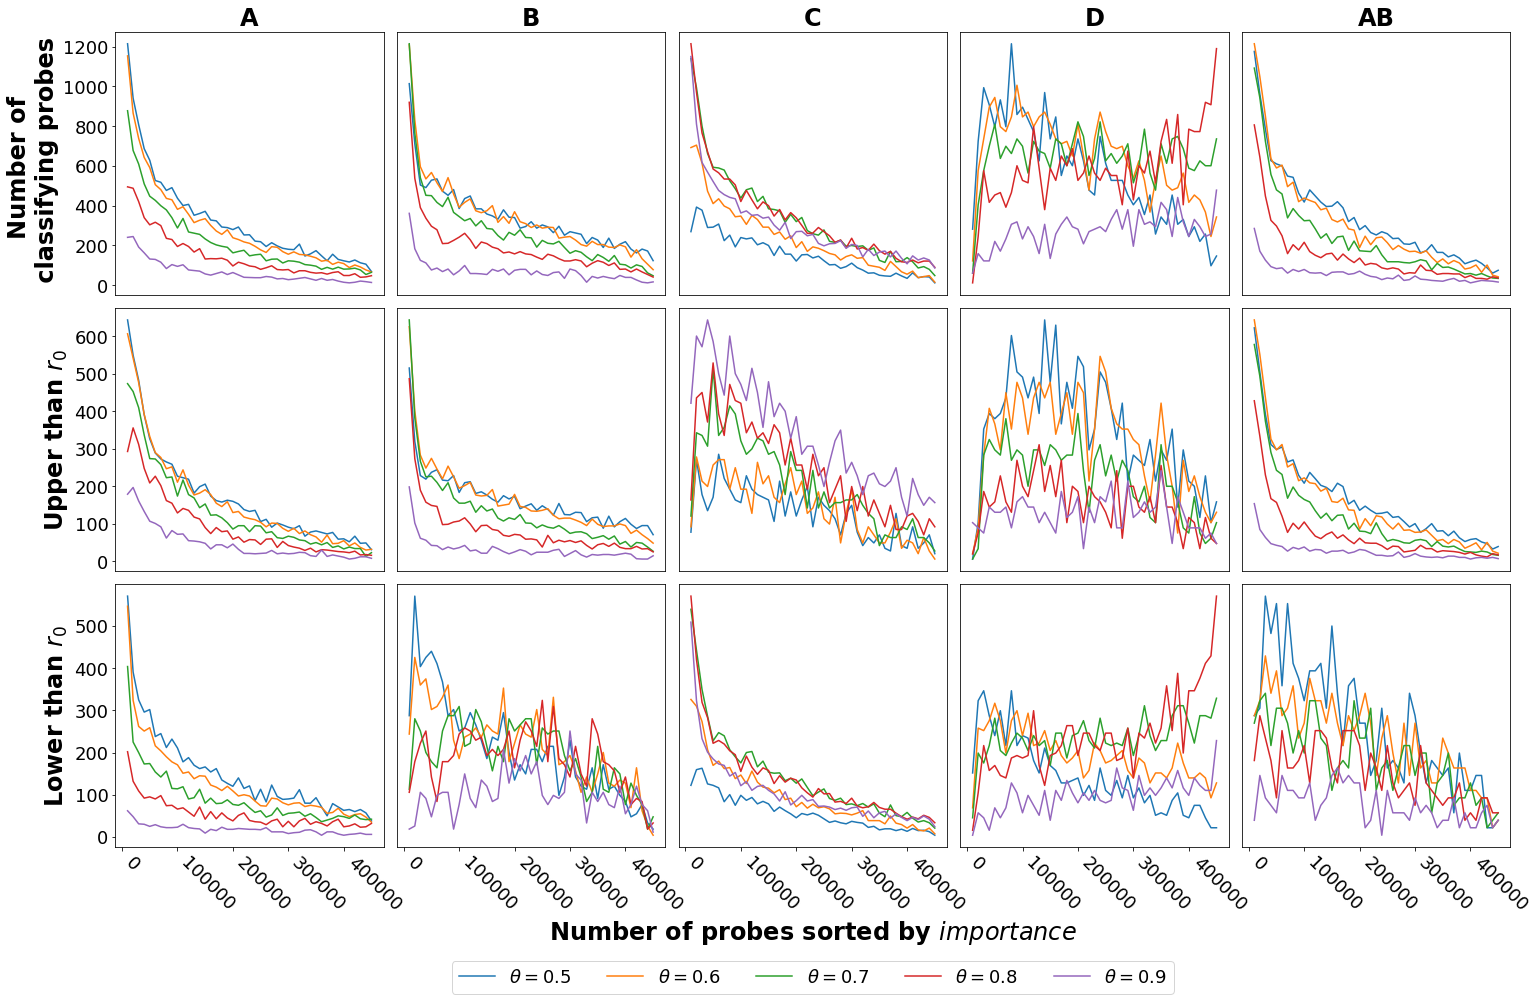

In [63]:
fig = plt.figure(figsize=(25, 15))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

ax_num = 1
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
#             sns.scatterplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel("Number of \n classifying probes", size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.5)
    plt.title(groups, size=24, weight="bold")
    ax_num+=1
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_large_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel(r'Upper than $r_0$', size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1 
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_small_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.xlabel("")
            plt.ylabel(r'Lower than $r_0$', size=24, weight="bold")
        elif groups=="C":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k, label=r"$\theta = $"+k.split("_")[-1])
            plt.legend(bbox_to_anchor=(0.5, -0.4), ncol=5, loc='upper center', fontsize=18)
            plt.yticks([])
            plt.xlabel("Number of probes sorted by "+r"$importance$", size=24, weight="bold")
            plt.ylabel("")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
            plt.xlabel("")
#             plt.legend()
    plt.xticks(size=18, rotation=-45, ha="left")
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1
plt.savefig(wd+"fig/imp_gini.pdf", bbox_inches="tight")


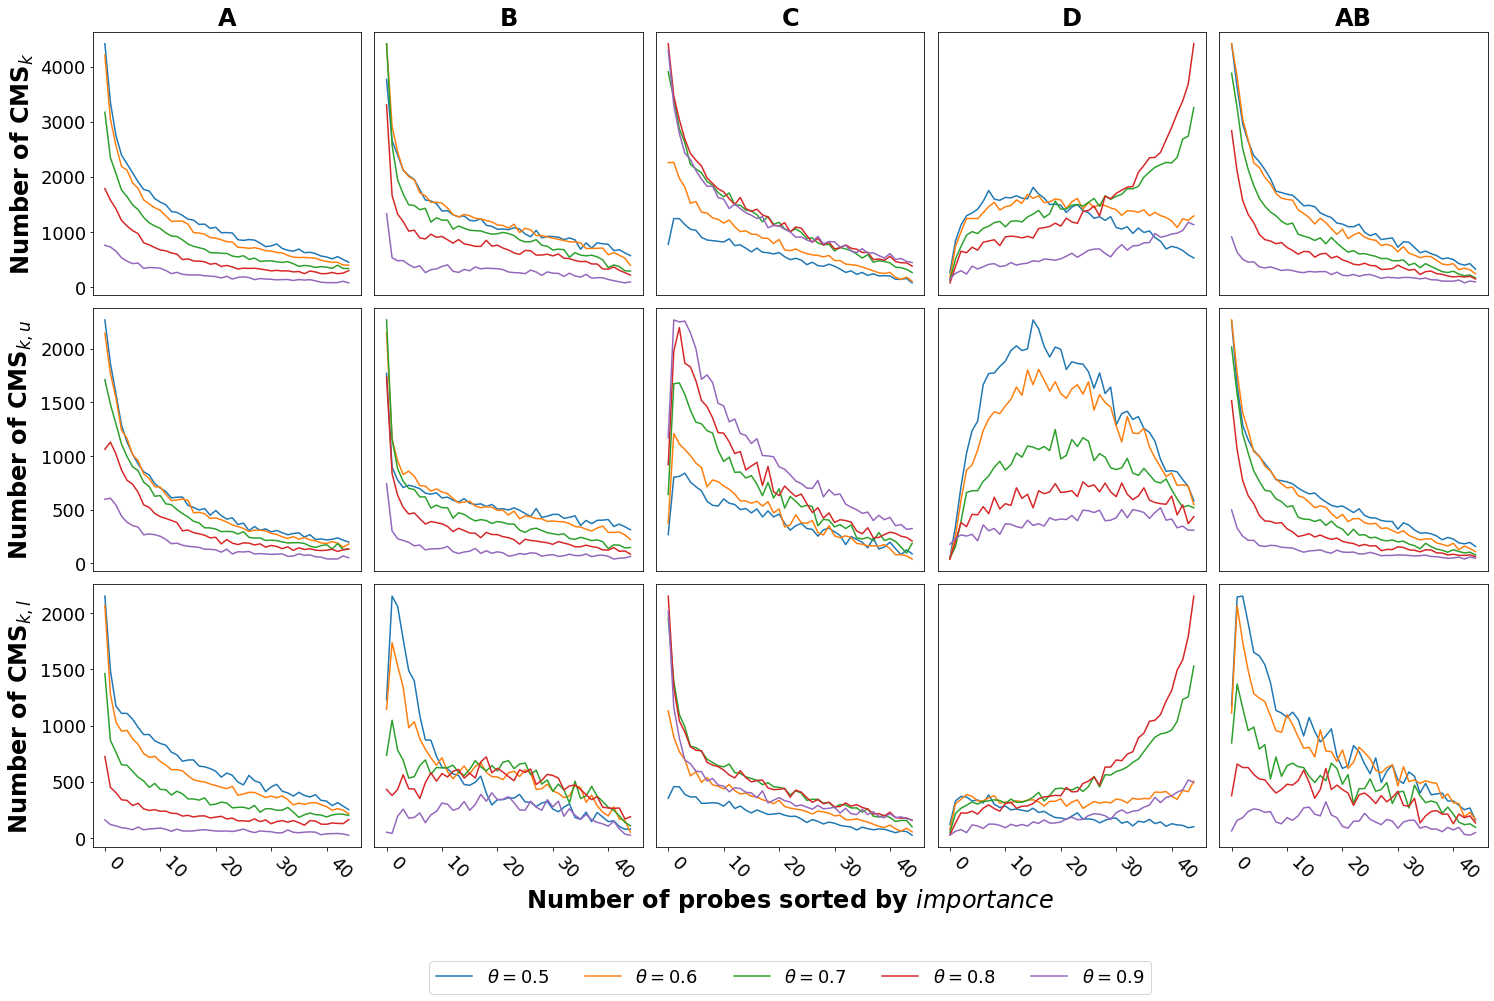

In [16]:
fig = plt.figure(figsize=(25, 15))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

ax_num = 1
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
#             sns.scatterplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel("Number of CMS"+r"$_k$", size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.5)
    plt.title(groups, size=24, weight="bold")
    ax_num+=1
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_large_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.ylabel("Number of CMS"+r"$_{k,u}$", size=24, weight="bold")
#             plt.ylabel(r'Upper than $r_0$', size=24, weight="bold")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
    plt.xticks([])
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1 
    
for groups in ["A","B","C","D","AB"]:
    ax = fig.add_subplot(3,5,ax_num)
    dataclass = [groups+"_small_"+str(i)  for i in [0.5,0.6,0.7,0.8,0.9]]
    for k in dataclass:
        if groups=="A":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks(size=18)
            plt.xlabel("")
#             plt.ylabel(r'Lower than $r_0$', size=24, weight="bold")
            plt.ylabel("Number of CMS"+r"$_{k,l}$", size=24, weight="bold")
        elif groups=="C":
            sns.lineplot(data=df_sum, x=df_sum.index, y=k, label=r"$\theta = $"+k.split("_")[-1])
            plt.legend(bbox_to_anchor=(0.5, -0.4), ncol=5, loc='upper center', fontsize=18)
            plt.yticks([])
            plt.xlabel("Number of probes sorted by "+r"$importance$", size=24, weight="bold")
            plt.ylabel("")
        else:
            sns.lineplot(data=df_sum, x=df_sum.index, y=k)
            plt.yticks([])
            plt.ylabel("")
            plt.xlabel("")
#             plt.legend()
    plt.xticks(size=18, rotation=-45, ha="left")
#     plt.ylim(0,0.28)
    plt.title("")
    ax_num+=1
plt.savefig(wd+"fig/imp_gini2.pdf", bbox_inches="tight")
